In [142]:
import pandas as pd
import numpy as np
import os
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:20,.2f}'.format
%matplotlib inline
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
data = r'C:\Users\ezchave\Desktop\3June'
files = os.listdir(data)

In [4]:
files

['incidents_IncidentId_Aug2018.csv',
 'incidents_IncidentId_Dec2018.csv',
 'incidents_IncidentId_Feb2019.csv',
 'incidents_IncidentId_Jan2019.csv',
 'incidents_IncidentId_Nov2018.csv',
 'incidents_IncidentId_Oct2018.csv',
 'incidents_IncidentId_Sep2018.csv']

In [5]:
# To append all the files 
jan_data=pd.read_csv(os.path.join(data,files[3]))
feb_data=pd.read_csv(os.path.join(data,files[2]))
dec_data=pd.read_csv(os.path.join(data,files[1]))
nov_data=pd.read_csv(os.path.join(data,files[4]))
oct_data=pd.read_csv(os.path.join(data,files[5]))
sep_data=pd.read_csv(os.path.join(data,files[6]))
aug_data=pd.read_csv(os.path.join(data,files[0]))

In [6]:
jan_data.head(3)

,cell_name,date,ACCESS_FAILURE_CC_503(1:223)_VOLTE_IMS,CALL_SETUP_DELAY_VOLTE_IMS,DROP_CC_408_VOLTE_IMS,DROP_CC_481_VOLTE_IMS,DROP_CC_503_VOLTE_IMS,DROP_CC_OTHER_VOLTE_IMS,DROP_SRVCC_TERMINATE_VOLTE_IMS,GARBLING_VOLTE_VOICE,IMMEDIATE_VOLUNTARY_DROP_DUE_TO_MEDIA_STOP_VOLTE,MUTING_VOLTE_VOICE,SOFT_DROP_DUE_TO_MEDIA_STOP_VOLTE_IMS,sum,call_count,est_count_handover,sum_drop_cc_503_481,GARBLING_VOLTE_VOICE_norm,MUTING_VOLTE_VOICE_norm,ACCESS_FAILURE_CC_503(1:223)_VOLTE_IMS_norm,DROP_CC_481_VOLTE_IMS_norm,CALL_SETUP_DELAY_VOLTE_IMS_norm,SOFT_DROP_DUE_TO_MEDIA_STOP_VOLTE_IMS_norm,DROP_CC_503_VOLTE_IMS_norm,DROP_CC_408_VOLTE_IMS_norm,DROP_CC_OTHER_VOLTE_IMS_norm,IMMEDIATE_VOLUNTARY_DROP_DUE_TO_MEDIA_STOP_VOLTE_norm,DROP_SRVCC_TERMINATE_VOLTE_IMS_norm,sum_norm,band,start_date
0,BBK04000A11,2019-01-01,4,2,0,10,0,0,0,134,0,11,0,161,382.00,61,0.03,0.35,0.03,0.01,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.42,band1900_1,2019-01-01
1,BBK04000A21,2019-01-01,9,7,0,1,0,0,0,145,0,24,1,187,"1,520.00",279,0.00,0.10,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12,band1900_1,2019-01-01
2,BBK04000A31,2019-01-01,15,9,1,9,2,0,0,97,1,10,2,146,"1,568.00",221,0.01,0.06,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.09,band1900_1,2019-01-01


In [7]:
dec_data.head(3)

,cell_name,date,ACCESS_FAILURE_CC_503(1:223)_VOLTE_IMS,CALL_SETUP_DELAY_VOLTE_IMS,DROP_CC_408_VOLTE_IMS,DROP_CC_481_VOLTE_IMS,DROP_CC_503_VOLTE_IMS,DROP_CC_OTHER_VOLTE_IMS,DROP_SRVCC_TERMINATE_VOLTE_IMS,GARBLING_VOLTE_VOICE,IMMEDIATE_VOLUNTARY_DROP_DUE_TO_MEDIA_STOP_VOLTE,MUTING_VOLTE_VOICE,SOFT_DROP_DUE_TO_MEDIA_STOP_VOLTE_IMS,sum,call_count,est_count_handover,sum_drop_cc_503_481,GARBLING_VOLTE_VOICE_norm,MUTING_VOLTE_VOICE_norm,ACCESS_FAILURE_CC_503(1:223)_VOLTE_IMS_norm,DROP_CC_481_VOLTE_IMS_norm,CALL_SETUP_DELAY_VOLTE_IMS_norm,DROP_CC_503_VOLTE_IMS_norm,SOFT_DROP_DUE_TO_MEDIA_STOP_VOLTE_IMS_norm,DROP_CC_408_VOLTE_IMS_norm,DROP_CC_OTHER_VOLTE_IMS_norm,IMMEDIATE_VOLUNTARY_DROP_DUE_TO_MEDIA_STOP_VOLTE_norm,DROP_SRVCC_TERMINATE_VOLTE_IMS_norm,sum_norm,band,start_date
0,BBK04000A11,2018-12-01,9,1,0,4,1,0,0,217,0,27,2,261,"1,174.00",258,0.00,0.18,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.22,band1900_1,2018-12-01
1,BBK04000A21,2018-12-01,16,6,0,1,6,0,0,279,0,40,3,351,"2,506.00",500,0.00,0.11,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.14,band1900_1,2018-12-01
2,BBK04000A31,2018-12-01,36,10,0,13,10,0,0,146,0,20,4,239,"2,843.00",474,0.01,0.05,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,band1900_1,2018-12-01


In [8]:
nov_data.head(3)

,cell_name,date,ACCESS_FAILURE_CC_503(1:223)_VOLTE_IMS,CALL_SETUP_DELAY_VOLTE_IMS,DROP_CC_408_VOLTE_IMS,DROP_CC_481_VOLTE_IMS,DROP_CC_503_VOLTE_IMS,DROP_CC_OTHER_VOLTE_IMS,DROP_SRVCC_TERMINATE_VOLTE_IMS,GARBLING_VOLTE_VOICE,IMMEDIATE_VOLUNTARY_DROP_DUE_TO_MEDIA_STOP_VOLTE,MUTING_VOLTE_VOICE,SOFT_DROP_DUE_TO_MEDIA_STOP_VOLTE_IMS,sum,call_count,est_count_handover,sum_drop_cc_503_481,GARBLING_VOLTE_VOICE_norm,MUTING_VOLTE_VOICE_norm,DROP_CC_481_VOLTE_IMS_norm,CALL_SETUP_DELAY_VOLTE_IMS_norm,ACCESS_FAILURE_CC_503(1:223)_VOLTE_IMS_norm,SOFT_DROP_DUE_TO_MEDIA_STOP_VOLTE_IMS_norm,DROP_CC_503_VOLTE_IMS_norm,DROP_CC_408_VOLTE_IMS_norm,DROP_CC_OTHER_VOLTE_IMS_norm,IMMEDIATE_VOLUNTARY_DROP_DUE_TO_MEDIA_STOP_VOLTE_norm,DROP_SRVCC_TERMINATE_VOLTE_IMS_norm,sum_norm,band,start_date
0,BBK04000A11,2018-11-01,5,2,0,10,0,0,0,184,0,41,3,245,526.00,72,0.02,0.35,0.08,0.02,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.47,band1900_1,2018-11-01
1,BBK04000A21,2018-11-01,0,12,1,5,6,0,0,454,0,92,4,574,"2,564.00",374,0.00,0.18,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.22,band1900_1,2018-11-01
2,BBK04000A31,2018-11-01,2,0,2,9,2,0,0,270,0,57,1,343,"1,680.00",198,0.01,0.16,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.20,band1900_1,2018-11-01


In [9]:
oct_data.head()

,cell_name,date,ACCESS_FAILURE_CC_503(1:223)_VOLTE_IMS,CALL_SETUP_DELAY_VOLTE_IMS,DROP_CC_408_VOLTE_IMS,DROP_CC_481_VOLTE_IMS,DROP_CC_503_VOLTE_IMS,DROP_CC_OTHER_VOLTE_IMS,DROP_SRVCC_TERMINATE_VOLTE_IMS,GARBLING_VOLTE_VOICE,IMMEDIATE_VOLUNTARY_DROP_DUE_TO_MEDIA_STOP_VOLTE,MUTING_VOLTE_VOICE,SOFT_DROP_DUE_TO_MEDIA_STOP_VOLTE_IMS,sum,call_count,est_count_handover,sum_drop_cc_503_481,GARBLING_VOLTE_VOICE_norm,MUTING_VOLTE_VOICE_norm,ACCESS_FAILURE_CC_503(1:223)_VOLTE_IMS_norm,DROP_CC_481_VOLTE_IMS_norm,CALL_SETUP_DELAY_VOLTE_IMS_norm,DROP_CC_503_VOLTE_IMS_norm,SOFT_DROP_DUE_TO_MEDIA_STOP_VOLTE_IMS_norm,DROP_CC_408_VOLTE_IMS_norm,DROP_CC_OTHER_VOLTE_IMS_norm,IMMEDIATE_VOLUNTARY_DROP_DUE_TO_MEDIA_STOP_VOLTE_norm,DROP_SRVCC_TERMINATE_VOLTE_IMS_norm,sum_norm,band,start_date
0,BBK04000A11,2018-10-01,5,0,0,1,0,0,0,139,0,19,2,166,179.00,34,0.01,0.78,0.11,0.03,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.93,band1900_1,2018-10-01
1,BBK04000A21,2018-10-01,3,1,0,3,1,0,0,133,0,42,0,183,649.00,117,0.01,0.20,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.28,band1900_1,2018-10-01
2,BBK04000A31,2018-10-01,2,7,0,10,0,0,0,141,0,20,4,184,"1,041.00",115,0.01,0.14,0.02,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.18,band1900_1,2018-10-01
3,BBK04011A11,2018-10-01,0,6,0,0,2,0,0,21,0,0,1,30,975.00,62,0.00,0.02,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.03,band1900_1,2018-10-01
4,BBK04011A21,2018-10-01,0,2,3,0,0,0,0,11,0,0,1,17,576.00,33,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.03,band1900_1,2018-10-01


In [10]:
sep_data.head(3)

,cell_name,date,ACCESS_FAILURE_CC_503(1:223)_VOLTE_IMS,CALL_SETUP_DELAY_VOLTE_IMS,DROP_CC_408_VOLTE_IMS,DROP_CC_481_VOLTE_IMS,DROP_CC_503_VOLTE_IMS,DROP_CC_OTHER_VOLTE_IMS,DROP_SRVCC_TERMINATE_VOLTE_IMS,GARBLING_VOLTE_VOICE,IMMEDIATE_VOLUNTARY_DROP_DUE_TO_MEDIA_STOP_VOLTE,MUTING_VOLTE_VOICE,SOFT_DROP_DUE_TO_MEDIA_STOP_VOLTE_IMS,sum,call_count,est_count_handover,sum_drop_cc_503_481,GARBLING_VOLTE_VOICE_norm,MUTING_VOLTE_VOICE_norm,SOFT_DROP_DUE_TO_MEDIA_STOP_VOLTE_IMS_norm,DROP_CC_481_VOLTE_IMS_norm,ACCESS_FAILURE_CC_503(1:223)_VOLTE_IMS_norm,CALL_SETUP_DELAY_VOLTE_IMS_norm,DROP_CC_408_VOLTE_IMS_norm,DROP_CC_503_VOLTE_IMS_norm,IMMEDIATE_VOLUNTARY_DROP_DUE_TO_MEDIA_STOP_VOLTE_norm,DROP_CC_OTHER_VOLTE_IMS_norm,DROP_SRVCC_TERMINATE_VOLTE_IMS_norm,sum_norm,band,start_date
0,BBK04000A11,2018-09-01,1,2,0,5,0,0,0,143,0,17,1,169,318.00,53,0.02,0.45,0.05,0.00,0.02,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.53,band1900_1,2018-09-01
1,BBK04000A21,2018-09-01,2,7,0,1,1,0,0,176,0,32,2,221,811.00,159,0.00,0.22,0.04,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.27,band1900_1,2018-09-01
2,BBK04000A31,2018-09-01,3,10,0,5,0,0,0,114,0,22,2,156,"1,162.00",130,0.00,0.10,0.02,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.13,band1900_1,2018-09-01


In [11]:
feb_data.head()

,cell_name,date,ACCESS_FAILURE_CC_503(1:223)_VOLTE_IMS,CALL_SETUP_DELAY_VOLTE_IMS,DROP_CC_408_VOLTE_IMS,DROP_CC_481_VOLTE_IMS,DROP_CC_503_VOLTE_IMS,DROP_CC_OTHER_VOLTE_IMS,DROP_SRVCC_TERMINATE_VOLTE_IMS,GARBLING_VOLTE_VOICE,IMMEDIATE_VOLUNTARY_DROP_DUE_TO_MEDIA_STOP_VOLTE,MUTING_VOLTE_VOICE,SOFT_DROP_DUE_TO_MEDIA_STOP_VOLTE_IMS,VOLTE_SETUP_FAILURE_CSFB_SUCCESS,sum,call_count,est_count_handover,sum_drop_cc_503_481,GARBLING_VOLTE_VOICE_norm,MUTING_VOLTE_VOICE_norm,DROP_CC_481_VOLTE_IMS_norm,CALL_SETUP_DELAY_VOLTE_IMS_norm,SOFT_DROP_DUE_TO_MEDIA_STOP_VOLTE_IMS_norm,ACCESS_FAILURE_CC_503(1:223)_VOLTE_IMS_norm,DROP_CC_503_VOLTE_IMS_norm,DROP_CC_408_VOLTE_IMS_norm,DROP_CC_OTHER_VOLTE_IMS_norm,IMMEDIATE_VOLUNTARY_DROP_DUE_TO_MEDIA_STOP_VOLTE_norm,DROP_SRVCC_TERMINATE_VOLTE_IMS_norm,VOLTE_SETUP_FAILURE_CSFB_SUCCESS_norm,sum_norm,band,start_date
0,BBK04000A11,2019-02-01,0,1,1,14,2,0,0,184,0,17,1,0,220,572.00,101,0.03,0.32,0.03,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.38,band1900_1,2019-02-01
1,BBK04000A21,2019-02-01,6,23,2,4,2,3,0,252,0,66,3,0,361,"2,770.00",491,0.00,0.09,0.02,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.13,band1900_1,2019-02-01
2,BBK04000A31,2019-02-01,5,8,0,8,0,0,0,224,0,34,1,0,280,"1,957.00",257,0.00,0.11,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.14,band1900_1,2019-02-01
3,BBK04011A11,2019-02-01,2,17,0,2,0,0,0,64,0,15,2,0,102,"5,110.00",298,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,band1900_1,2019-02-01
4,BBK04011A21,2019-02-01,2,4,0,0,2,0,0,11,0,3,2,0,24,"1,982.00",160,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,band1900_1,2019-02-01


In [12]:
# append sep, Oct, Nov, Dec
#sep_dec_data=sep_data.append([oct_data,nov_data,dec_data])
aug_feb_data=aug_data.append([sep_data,oct_data,nov_data,dec_data, jan_data, feb_data])

C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [13]:
print(aug_data.shape),print(sep_data.shape);print(oct_data.shape);print(nov_data.shape);print(dec_data.shape);print(jan_data.shape);print(feb_data.shape),print(aug_feb_data.shape)

(308883, 31)
(287352, 31)
(278654, 31)
(306692, 31)
(298499, 31)
(235078, 31)
(158520, 33)
(1873678, 33)


(None, None)

In [14]:
aug_feb_data.head()

,ACCESS_FAILURE_CC_503(1:223)_VOLTE_IMS,ACCESS_FAILURE_CC_503(1:223)_VOLTE_IMS_norm,CALL_SETUP_DELAY_VOLTE_IMS,CALL_SETUP_DELAY_VOLTE_IMS_norm,DROP_CC_408_VOLTE_IMS,DROP_CC_408_VOLTE_IMS_norm,DROP_CC_481_VOLTE_IMS,DROP_CC_481_VOLTE_IMS_norm,DROP_CC_503_VOLTE_IMS,DROP_CC_503_VOLTE_IMS_norm,DROP_CC_OTHER_VOLTE_IMS,DROP_CC_OTHER_VOLTE_IMS_norm,DROP_SRVCC_TERMINATE_VOLTE_IMS,DROP_SRVCC_TERMINATE_VOLTE_IMS_norm,GARBLING_VOLTE_VOICE,GARBLING_VOLTE_VOICE_norm,IMMEDIATE_VOLUNTARY_DROP_DUE_TO_MEDIA_STOP_VOLTE,IMMEDIATE_VOLUNTARY_DROP_DUE_TO_MEDIA_STOP_VOLTE_norm,MUTING_VOLTE_VOICE,MUTING_VOLTE_VOICE_norm,SOFT_DROP_DUE_TO_MEDIA_STOP_VOLTE_IMS,SOFT_DROP_DUE_TO_MEDIA_STOP_VOLTE_IMS_norm,VOLTE_SETUP_FAILURE_CSFB_SUCCESS,VOLTE_SETUP_FAILURE_CSFB_SUCCESS_norm,band,call_count,cell_name,date,est_count_handover,start_date,sum,sum_drop_cc_503_481,sum_norm
0,1,0.00,1,0.00,0,0.00,13,0.03,1,0.00,0,0.00,0,0.00,269,0.61,0,0.00,34,0.08,1,0.00,nan,nan,band1900_1,442.00,BBK04000A11,8/1/2018,85,8/1/2018,320,0.03,0.72
1,2,0.00,5,0.00,0,0.00,10,0.00,0,0.00,1,0.00,0,0.00,339,0.16,0,0.00,47,0.02,3,0.00,nan,nan,band1900_1,"2,063.00",BBK04000A21,8/1/2018,379,8/1/2018,407,0.00,0.20
2,5,0.00,10,0.01,0,0.00,12,0.01,4,0.00,0,0.00,0,0.00,221,0.14,0,0.00,28,0.02,4,0.00,nan,nan,band1900_1,"1,594.00",BBK04000A31,8/1/2018,195,8/1/2018,284,0.01,0.18
3,2,0.00,9,0.00,0,0.00,0,0.00,2,0.00,0,0.00,0,0.00,44,0.02,0,0.00,2,0.00,2,0.00,nan,nan,band1900_1,"2,826.00",BBK04011A11,8/1/2018,170,8/1/2018,61,0.00,0.02
4,0,0.00,3,0.00,0,0.00,0,0.00,0,0.00,2,0.00,0,0.00,31,0.04,0,0.00,0,0.00,0,0.00,nan,nan,band1900_1,737.00,BBK04011A21,8/1/2018,58,8/1/2018,36,0.00,0.05


In [16]:
jan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235078 entries, 0 to 235077
Data columns (total 31 columns):
cell_name                                                235078 non-null object
date                                                     235078 non-null object
ACCESS_FAILURE_CC_503(1:223)_VOLTE_IMS                   235078 non-null int64
CALL_SETUP_DELAY_VOLTE_IMS                               235078 non-null int64
DROP_CC_408_VOLTE_IMS                                    235078 non-null int64
DROP_CC_481_VOLTE_IMS                                    235078 non-null int64
DROP_CC_503_VOLTE_IMS                                    235078 non-null int64
DROP_CC_OTHER_VOLTE_IMS                                  235078 non-null int64
DROP_SRVCC_TERMINATE_VOLTE_IMS                           235078 non-null int64
GARBLING_VOLTE_VOICE                                     235078 non-null int64
IMMEDIATE_VOLUNTARY_DROP_DUE_TO_MEDIA_STOP_VOLTE         235078 non-null int64
MUTING_VOLTE_VOICE

In [17]:
features1 = ['ACCESS_FAILURE_CC_503(1:223)_VOLTE_IMS', 
            'CALL_SETUP_DELAY_VOLTE_IMS',
       'DROP_CC_408_VOLTE_IMS', 'DROP_CC_OTHER_VOLTE_IMS',
       'GARBLING_VOLTE_VOICE',
       'IMMEDIATE_VOLUNTARY_DROP_DUE_TO_MEDIA_STOP_VOLTE',
       'MUTING_VOLTE_VOICE', 'SOFT_DROP_DUE_TO_MEDIA_STOP_VOLTE_IMS',
       'hard_drop_call_503_481']

In [18]:
grp_dict1= {'ACCESS_FAILURE_CC_503(1:223)_VOLTE_IMS' :'sum',
        'CALL_SETUP_DELAY_VOLTE_IMS': 'sum',
        'DROP_CC_408_VOLTE_IMS' : 'sum',
       #'DROP_CC_481_VOLTE_IMS': 'sum',
       #'DROP_CC_503_VOLTE_IMS': 'sum',
       'DROP_CC_OTHER_VOLTE_IMS': 'sum',
       'GARBLING_VOLTE_VOICE': 'sum',
       'IMMEDIATE_VOLUNTARY_DROP_DUE_TO_MEDIA_STOP_VOLTE': 'sum',
       'MUTING_VOLTE_VOICE': 'sum', 
      'SOFT_DROP_DUE_TO_MEDIA_STOP_VOLTE_IMS':  'sum',
       'sum_drop_call_503_481': 'sum',
       'call_count': 'sum'} 

In [19]:
rank_dates=[
    
    '2018-08-08','2018-08-09','2018-08-10','2018-09-11','2018-09-12',
    '2018-08-13','2018-08-14','2018-08-15','2018-08-16','2018-08-17',
    '2018-08-18','2018-08-19','2018-08-20','2018-08-21','2018-08-22',
    '2018-08-23','2018-08-24','2018-08-25','2018-08-26','2018-08-27',
    '2018-08-28',
    '2018-08-29','2018-08-30','2018-08-31','2018-09-01','2018-09-02',
    '2018-09-03','2018-09-04','2018-09-05','2018-09-06','2018-09-07',
    '2018-09-08','2018-09-09','2018-09-10','2018-09-11','2018-09-12',
    '2018-09-13','2018-09-14','2018-09-15','2018-09-16','2018-09-17',
          '2018-09-18','2018-09-19','2018-09-20','2018-09-21','2018-09-22','2018-09-23',
          '2018-09-24','2018-09-25','2018-09-26','2018-09-27',
          '2018-09-28','2018-09-29','2018-09-30','2018-10-01','2018-10-02',
          '2018-10-03','2018-10-04','2018-10-05','2018-10-06','2018-10-07',
          '2018-10-08','2018-10-09','2018-10-10','2018-10-11','2018-10-12',
          '2018-10-13','2018-10-14','2018-10-15','2018-10-16','2018-10-17',
          '2018-10-18','2018-10-19','2018-10-20','2018-10-21','2018-10-22',
           '2018-10-23','2018-10-24','2018-10-25','2018-10-26','2018-10-27',
          '2018-10-28','2018-10-29','2018-10-30','2018-10-31','2018-11-01',
           '2018-11-02','2018-11-03','2018-11-04','2018-11-05','2018-11-06',
           '2018-11-07','2018-11-08','2018-11-09','2018-11-10','2018-11-11',
           '2018-11-12','2018-11-13','2018-11-14','2018-11-15','2018-11-16',
           '2018-11-17','2018-11-18','2018-11-19','2018-11-20','2018-11-21',
           '2018-11-22','2018-11-23','2018-11-24','2018-11-25','2018-11-26',
           '2018-11-27','2018-11-28','2018-11-29','2018-11-30','2018-12-01',
           '2018-12-02','2018-12-03','2018-12-04','2018-12-05','2018-12-06',
           '2018-12-07','2018-12-08','2018-12-09','2018-12-10','2018-12-11',
           '2018-12-12','2018-12-13','2018-12-14','2018-12-15','2018-12-16',
           '2018-12-17','2018-12-18','2018-12-19','2018-12-20','2018-12-21',
           '2018-12-22','2018-12-23','2018-12-24','2018-12-25','2018-12-26',
            '2018-12-27','2018-12-28','2018-12-29','2018-12-30','2018-12-31',
            '2019-01-01','2019-01-02','2019-01-03','2019-01-04','2019-01-05',
            '2019-01-06','2019-01-07','2019-01-08','2019-01-09','2019-01-10',
             '2019-01-11','2019-01-12','2019-01-13','2019-01-14','2019-01-15',
             '2019-01-16','2019-01-17','2019-01-28','2019-01-29','2019-01-30',
             '2019-01-31','2019-02-01','2019-02-02','2019-02-03','2019-02-04',
             '2019-02-05','2019-02-06','2019-02-07','2019-02-08', '2019-02-09'
    ]

In [20]:
len(rank_dates)

176

In [21]:
def Rolling_data_PCA_Percentile(df,rank_dates, nr_days, features):
    # output path
    Output_path='C:\Mywork\MXE\Output'
    
    # Coverting date column to datetime datatype
    df.date = pd.to_datetime(df.date)
    
    # creating Blank data frames for storing the output of the iterations 
    rolledup_data=pd.DataFrame(columns=["ACCESS_FAILURE_CC_503(1:223)_VOLTE_IMS","CALL_SETUP_DELAY_VOLTE_IMS",
                                        "DROP_CC_408_VOLTE_IMS","DROP_CC_OTHER_VOLTE_IMS","GARBLING_VOLTE_VOICE",
                                        "IMMEDIATE_VOLUNTARY_DROP_DUE_TO_MEDIA_STOP_VOLTE","MUTING_VOLTE_VOICE",
                                        "SOFT_DROP_DUE_TO_MEDIA_STOP_VOLTE_IMS","hard_drop_call_503_481",
                                        "cell_name","band","date"])

    final_df_band2100 = pd.DataFrame(columns=["cell_name","band","score","date","rank","percentile"])
    final_df_band700 = pd.DataFrame(columns=["cell_name","band","score","date","rank","percentile"])
    final_df_band1900_1 = pd.DataFrame(columns=["cell_name","band","score","date","rank","percentile"])
    
    
    for rank_date in rank_dates:
        
        # coverting rank_date string to date 
        rank_date = dt.date(*map(int, rank_date.split('-')))
        print(rank_date)
        # Preparing the window for 7 days
        start_date = rank_date - dt.timedelta(1)
        end_date = start_date - dt.timedelta(nr_days)
        #print(df['date'].head(2))
        dff = df[(df['date'] < rank_date) & (df['date'] >= end_date)]
        # CHANGE MADE HERE
        dff['hard_drop_call_503_481']= dff['DROP_CC_481_VOLTE_IMS']+ dff['DROP_CC_503_VOLTE_IMS']
         # CHNAGE MADE HERE
        # grouping by cell_name , band
        grp_dict1= {'ACCESS_FAILURE_CC_503(1:223)_VOLTE_IMS' :'sum',
            'CALL_SETUP_DELAY_VOLTE_IMS': 'sum',
            'DROP_CC_408_VOLTE_IMS' : 'sum',
           'DROP_CC_OTHER_VOLTE_IMS': 'sum',
           'GARBLING_VOLTE_VOICE': 'sum',
           'IMMEDIATE_VOLUNTARY_DROP_DUE_TO_MEDIA_STOP_VOLTE': 'sum',
           'MUTING_VOLTE_VOICE': 'sum', 
           'SOFT_DROP_DUE_TO_MEDIA_STOP_VOLTE_IMS':  'sum',
           'hard_drop_call_503_481': 'sum',
           'call_count': 'sum'} 
    
        df1 = dff.groupby(['cell_name','band']).agg(grp_dict1 , as_index = False)
    
        df1.reset_index(inplace=True)
    
        df2= df1.iloc[:,2:].div(df1.call_count, axis=0)
    
        df3 = pd.concat([df2.iloc[:,0:9], df1[['cell_name','band']]], axis = 1)
        
        df3['date']=rank_date
        
         # append all iterations
        rolledup_data=rolledup_data.append(df3,ignore_index = True)
    
        ##########################################
        # ----------------Band 2100---------- ####
        ##########################################
        # Separating out the features
        df_band2100 = df3[df3.band == 'band2100']
        df_band2100.reset_index(inplace = True)
        x = df_band2100.loc[:, features1].values
        # Standardizing the features
        x = StandardScaler().fit_transform(x)
        # doing PCA
        pca = PCA()
        principalComponents = pca.fit_transform(x)
        # converting to dataframe
        principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3',
                          'principal component 4','principal component 5', 'principal component 6',
                         'principal component 7','principal component 8', 'principal component 9'
                          ])
        # selecting where explained variance >= 1
        exp_variance = pca.explained_variance_
        # fetching indexes
        idx = np.where(exp_variance >= 1)[0]
        #print(idx) ; print(type(idx[0]))
        #fetching multipliers
        exp_ratio = pca.explained_variance_ratio_[idx]
        # slicing Principal components and adding cell_name & band
        cols=['cell_name', 'band']
        _df_band2100 =  pd.concat([principalDf.iloc[:,idx], df_band2100[cols]], axis = 1)
        _df_band2100['score'] = np.sum(_df_band2100.iloc[:,idx] * exp_ratio , axis = 1)
        _df_band2100['date'] = rank_date
        _df_band2100.sort_values(by=['score'],ascending=True , inplace=True)
        _df_band2100.reset_index(inplace= True)
        _df_band2100['rank'] = _df_band2100.index.values+1
        _df_band2100 = _df_band2100[['cell_name','band','score','date','rank']]
        
        _df_band2100['percentile'] = _df_band2100.score.rank(pct = True)
        _df_band2100.percentile = 1 - _df_band2100.percentile 
        _df_band2100.percentile = _df_band2100.percentile * 100
        
        
        # append all iterations
        final_df_band2100=_df_band2100.append(final_df_band2100,ignore_index = True)
        print('success')
        print(final_df_band2100.head(2))
        
        
        ##########################################
        # ----------------Band 1900_1---------- ####
        ##########################################
        # Separating out the features
        df_band1900_1 = df3[df3.band == 'band1900_1']
        df_band1900_1.reset_index(inplace = True)
        x = df_band1900_1.loc[:, features1].values
        # Standardizing the features
        x = StandardScaler().fit_transform(x)
        # doing PCA
        pca = PCA()
        principalComponents = pca.fit_transform(x)
        # converting to dataframe
        principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3',
                          'principal component 4','principal component 5', 'principal component 6',
                         'principal component 7','principal component 8', 'principal component 9'
                          ])
        # selecting where explained variance >= 1
        exp_variance = pca.explained_variance_
        # fetching indexes
        idx = np.where(exp_variance >= 1)[0]
        #print(idx) ; print(type(idx[0]))
        #fetching multipliers
        exp_ratio = pca.explained_variance_ratio_[idx]
        # slicing Principal components and adding cell_name & band
        cols=['cell_name', 'band']
        _df_band1900_1 =  pd.concat([principalDf.iloc[:,idx], df_band1900_1[cols]], axis = 1)
        _df_band1900_1['score'] = np.sum(_df_band1900_1.iloc[:,idx] * exp_ratio , axis = 1)
        _df_band1900_1['date'] = rank_date
        _df_band1900_1.sort_values(by=['score'],ascending=True , inplace=True)
        _df_band1900_1.reset_index(inplace= True)
        _df_band1900_1['rank'] = _df_band1900_1.index.values+1
        _df_band1900_1 = _df_band1900_1[['cell_name','band','score','date','rank']]
        
        _df_band1900_1['percentile'] = _df_band1900_1.score.rank(pct = True)
        _df_band1900_1.percentile = 1 - _df_band1900_1.percentile 
        _df_band1900_1.percentile = _df_band1900_1.percentile * 100
        
        # append all iterations
        final_df_band1900_1=_df_band1900_1.append(final_df_band1900_1,ignore_index = True)
        print('success')
        print(final_df_band1900_1.head(2))
        
        ##########################################
        # ----------------Band 700---------- ####
        ##########################################
        # Separating out the features
        df_band700 = df3[df3.band == 'band700']
        df_band700.reset_index(inplace = True)
        x = df_band700.loc[:, features1].values
        # Standardizing the features
        x = StandardScaler().fit_transform(x)
        # doing PCA
        pca = PCA()
        principalComponents = pca.fit_transform(x)
        # converting to dataframe
        principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3',
                          'principal component 4','principal component 5', 'principal component 6',
                         'principal component 7','principal component 8', 'principal component 9'
                          ])
        # selecting where explained variance >= 1
        exp_variance = pca.explained_variance_
        # fetching indexes
        idx = np.where(exp_variance >= 1)[0]
        #print(idx) ; print(type(idx[0]))
        #fetching multipliers
        exp_ratio = pca.explained_variance_ratio_[idx]
        # slicing Principal components and adding cell_name & band
        cols=['cell_name', 'band']
        _df_band700 =  pd.concat([principalDf.iloc[:,idx], df_band700[cols]], axis = 1)
        _df_band700['score'] = np.sum(_df_band700.iloc[:,idx] * exp_ratio , axis = 1)
        _df_band700['date'] = rank_date
        _df_band700.sort_values(by=['score'],ascending=True , inplace=True)
        _df_band700.reset_index(inplace= True)
        _df_band700['rank'] = _df_band700.index.values+1
        _df_band700 = _df_band700[['cell_name','band','score','date','rank']]
        _df_band700['percentile'] = _df_band700.score.rank(pct = True)
        _df_band700.percentile = 1 - _df_band700.percentile 
        _df_band700.percentile = _df_band700.percentile * 100
        
        # append all iterations
        final_df_band700=_df_band700.append(final_df_band700,ignore_index = True)
        print('success')
        print(final_df_band700.head(2))
        
        

    return final_df_band2100, final_df_band1900_1,final_df_band700, rolledup_data
     # Exporting the files
            
        #final_df_band2100.to_csv(Output_path +'/ranked_2100' + '_' + str(rank_date) + '.csv') 
        #final_df_band700.to_csv(Output_path +'/ranked_700' + '_' + str(rank_date) + '.csv')  
        #final_df_band1900_1.to_csv(Output_path +'/ranked_1900_1' + '_' + str(rank_date) + '.csv')


In [22]:
Consolidated_df_band2100,Consolidated_df_band1900_1,Consolidated_df_band700, Consolidated_data_all = Rolling_data_PCA_Percentile(aug_feb_data, rank_dates, 7, features1)

2018-08-08


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBQ04540D11  band2100                -0.74  2018-08-08    1   
1  LBQ04699A21  band2100                -0.73  2018-08-08    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04925E31  band1900_1                -0.81  2018-08-08    1   
1  BBQ04266A31  band1900_1                -0.76  2018-08-08    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ04254A31  band700                -1.14  2018-08-08    1   
1  DBQ04266A31  band700                -1.06  2018-08-08    2   

            percentile  
0                99.97  
1                99.93  
2018-08-09


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBQ04977A11  band2100                -1.26  2018-08-09    1   
1  LBX03744A21  band2100                -1.14  2018-08-09    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04591B11  band1900_1                -0.70  2018-08-09    1   
1  BBQ06061C11  band1900_1                -0.70  2018-08-09    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ04254A31  band700                -1.17  2018-08-09    1   
1  DBQ04266A31  band700                -1.11  2018-08-09    2   

            percentile  
0                99.97  
1                99.93  
2018-08-10


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBQ04540D11  band2100                -0.79  2018-08-10    1   
1  LBQ04564A11  band2100                -0.76  2018-08-10    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBK04025A21  band1900_1                -0.68  2018-08-10    1   
1  BBQ04260B21  band1900_1                -0.67  2018-08-10    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ04254A21  band700                -1.14  2018-08-10    1   
1  DBQ04254A31  band700                -1.13  2018-08-10    2   

            percentile  
0                99.97  
1                99.93  
2018-09-11


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYB0701A21  band2100                -1.04  2018-09-11    1   
1  LNYM1033A21  band2100                -1.00  2018-09-11    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ06174B31  band1900_1                -0.69  2018-09-11    1   
1  BBQ06069B21  band1900_1                -0.68  2018-09-11    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DNY01726D31  band700                -1.07  2018-09-11    1   
1  DBQ04927D11  band700                -1.04  2018-09-11    2   

            percentile  
0                99.97  
1                99.93  
2018-09-12


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYM1033A21  band2100                -1.23  2018-09-12    1   
1  LNYB0701A21  band2100                -0.88  2018-09-12    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04199A11  band1900_1                -0.65  2018-09-12    1   
1  BBQ04813C11  band1900_1                -0.64  2018-09-12    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQM6067A21  band700                -1.09  2018-09-12    1   
1  DBQ04254A21  band700                -1.03  2018-09-12    2   

            percentile  
0                99.97  
1                99.93  
2018-08-13


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYB0801A41  band2100                -0.94  2018-08-13    1   
1  LBQ04564A11  band2100                -0.92  2018-08-13    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04830A11  band1900_1                -0.64  2018-08-13    1   
1  BBQ06066B21  band1900_1                -0.64  2018-08-13    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ04266A31  band700                -1.11  2018-08-13    1   
1  DBQ06083B31  band700                -1.07  2018-08-13    2   

            percentile  
0                99.97  
1                99.93  
2018-08-14


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYB0801A41  band2100                -1.02  2018-08-14    1   
1  LBQ04564A11  band2100                -0.93  2018-08-14    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ06174B31  band1900_1                -0.68  2018-08-14    1   
1  BBQ04830A11  band1900_1                -0.68  2018-08-14    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DNY01726D31  band700                -1.10  2018-08-14    1   
1  DBQ04266A31  band700                -1.09  2018-08-14    2   

            percentile  
0                99.97  
1                99.93  
2018-08-15


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBQ06012A11  band2100                -1.22  2018-08-15    1   
1  LNYB0702A61  band2100                -1.15  2018-08-15    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04181B21  band1900_1                -0.75  2018-08-15    1   
1  BBQ06111E11  band1900_1                -0.75  2018-08-15    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBK04025A31  band700                -1.10  2018-08-15    1   
1  DNY01846A21  band700                -1.09  2018-08-15    2   

            percentile  
0                99.97  
1                99.93  
2018-08-16


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYB0702A61  band2100                -1.23  2018-08-16    1   
1  LBQ06012A11  band2100                -1.20  2018-08-16    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04152A21  band1900_1                -0.74  2018-08-16    1   
1  BBQ06030B11  band1900_1                -0.72  2018-08-16    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBK04025A31  band700                -1.13  2018-08-16    1   
1  DBX03131E11  band700                -1.11  2018-08-16    2   

            percentile  
0                99.97  
1                99.93  
2018-08-17


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYB0801A41  band2100                -1.31  2018-08-17    1   
1  LBQM6042A11  band2100                -0.85  2018-08-17    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04152A21  band1900_1                -0.74  2018-08-17    1   
1  BBQ04542A31  band1900_1                -0.71  2018-08-17    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ04289B21  band700                -1.17  2018-08-17    1   
1  DBQ04987D11  band700                -1.14  2018-08-17    2   

            percentile  
0                99.97  
1                99.93  
2018-08-18


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYB0801A41  band2100                -1.44  2018-08-18    1   
1  LBQM6042A11  band2100                -0.80  2018-08-18    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04152A21  band1900_1                -0.75  2018-08-18    1   
1  BBQ04126B11  band1900_1                -0.71  2018-08-18    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ04987D11  band700                -1.26  2018-08-18    1   
1  DBQ04289B21  band700                -1.22  2018-08-18    2   

            percentile  
0                99.97  
1                99.93  
2018-08-19


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYB0801A41  band2100                -1.63  2018-08-19    1   
1  LNYM1033A21  band2100                -0.92  2018-08-19    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04139A11  band1900_1                -0.71  2018-08-19    1   
1  BBQM6030A31  band1900_1                -0.70  2018-08-19    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ04987D11  band700                -1.20  2018-08-19    1   
1  DBQ04289B21  band700                -1.19  2018-08-19    2   

            percentile  
0                99.97  
1                99.93  
2018-08-20


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYB0801A41  band2100                -1.56  2018-08-20    1   
1  LBQ04270A91  band2100                -0.86  2018-08-20    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04126B11  band1900_1                -0.75  2018-08-20    1   
1  BBQ04152A21  band1900_1                -0.74  2018-08-20    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ04289B21  band700                -1.16  2018-08-20    1   
1  DBQ04987D11  band700                -1.16  2018-08-20    2   

            percentile  
0                99.97  
1                99.93  
2018-08-21


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYB0801A41  band2100                -0.54  2018-08-21    1   
1  LBQ04844A21  band2100                -0.44  2018-08-21    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04126B11  band1900_1                -0.76  2018-08-21    1   
1  BBQ04567E31  band1900_1                -0.73  2018-08-21    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DNY01038A11  band700                -1.33  2018-08-21    1   
1  DBQ04987D11  band700                -1.33  2018-08-21    2   

            percentile  
0                99.97  
1                99.93  
2018-08-22


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYB0801A41  band2100                -0.64  2018-08-22    1   
1  LBQ04844A21  band2100                -0.51  2018-08-22    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04126B11  band1900_1                -0.77  2018-08-22    1   
1  BBQ04737D31  band1900_1                -0.74  2018-08-22    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ04591B11  band700                -1.30  2018-08-22    1   
1  DNY01038A11  band700                -1.27  2018-08-22    2   

            percentile  
0                99.97  
1                99.93  
2018-08-23


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYB0801A41  band2100                -0.77  2018-08-23    1   
1  LNYB0701A21  band2100                -0.57  2018-08-23    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ06230A21  band1900_1                -0.76  2018-08-23    1   
1  BBQ04737D31  band1900_1                -0.75  2018-08-23    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DNY01726D31  band700                -1.19  2018-08-23    1   
1  DBKM4095A21  band700                -1.15  2018-08-23    2   

            percentile  
0                99.97  
1                99.93  
2018-08-24


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYB0801A41  band2100                -0.81  2018-08-24    1   
1  LNYB0701A21  band2100                -0.61  2018-08-24    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ06230A21  band1900_1                -0.85  2018-08-24    1   
1  BBQ04737D31  band1900_1                -0.76  2018-08-24    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DNY01726D31  band700                -1.22  2018-08-24    1   
1  DBKM4095A21  band700                -1.18  2018-08-24    2   

            percentile  
0                99.97  
1                99.93  
2018-08-25


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBX03147A21  band2100                -0.66  2018-08-25    1   
1  LBQ04680A11  band2100                -0.58  2018-08-25    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ06230A21  band1900_1                -0.86  2018-08-25    1   
1  BBQ04737D31  band1900_1                -0.76  2018-08-25    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBKM4095A21  band700                -1.20  2018-08-25    1   
1  DNY01726D31  band700                -1.20  2018-08-25    2   

            percentile  
0                99.97  
1                99.93  
2018-08-26


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYY0102A11  band2100                -0.83  2018-08-26    1   
1  LBQ04834D21  band2100                -0.65  2018-08-26    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04865A11  band1900_1                -0.84  2018-08-26    1   
1  BBQ06090A21  band1900_1                -0.83  2018-08-26    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBKM4095A21  band700                -1.14  2018-08-26    1   
1  DBQ04254A31  band700                -1.12  2018-08-26    2   

            percentile  
0                99.97  
1                99.93  
2018-08-27


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYY0102A11  band2100                -0.79  2018-08-27    1   
1  LBQ04834D21  band2100                -0.72  2018-08-27    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBX03007A31  band1900_1                -0.97  2018-08-27    1   
1  BBQ04865A11  band1900_1                -0.95  2018-08-27    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ04254A31  band700                -1.12  2018-08-27    1   
1  DBQ04254A21  band700                -1.12  2018-08-27    2   

            percentile  
0                99.97  
1                99.93  
2018-08-28


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYB0801A41  band2100                -1.89  2018-08-28    1   
1  LNYB0701A21  band2100                -1.44  2018-08-28    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBX03007A31  band1900_1                -0.93  2018-08-28    1   
1  BBQ04865A11  band1900_1                -0.84  2018-08-28    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ04254A31  band700                -1.18  2018-08-28    1   
1  DNY01726D31  band700                -1.16  2018-08-28    2   

            percentile  
0                99.97  
1                99.93  
2018-08-29


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYB0801A41  band2100                -1.69  2018-08-29    1   
1  LNYB0701A21  band2100                -1.14  2018-08-29    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04865A11  band1900_1                -0.84  2018-08-29    1   
1  BBX03007A31  band1900_1                -0.81  2018-08-29    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DNY01726D31  band700                -1.18  2018-08-29    1   
1  DBQ04927D11  band700                -1.14  2018-08-29    2   

            percentile  
0                99.97  
1                99.93  
2018-08-30


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYB0801A41  band2100                -1.11  2018-08-30    1   
1  LNYB0701A21  band2100                -1.09  2018-08-30    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBX03007A31  band1900_1                -0.75  2018-08-30    1   
1  BBQ06083B21  band1900_1                -0.73  2018-08-30    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ04927D11  band700                -1.26  2018-08-30    1   
1  DNY01726D31  band700                -1.21  2018-08-30    2   

            percentile  
0                99.97  
1                99.93  
2018-08-31


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYB0801A41  band2100                -1.02  2018-08-31    1   
1  LNYB0701A21  band2100                -0.95  2018-08-31    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ06174B31  band1900_1                -0.75  2018-08-31    1   
1  BBQ04966B11  band1900_1                -0.74  2018-08-31    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ04927D11  band700                -1.37  2018-08-31    1   
1  DNY01726D31  band700                -1.30  2018-08-31    2   

            percentile  
0                99.97  
1                99.93  
2018-09-01


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYB0701A21  band2100                -0.97  2018-09-01    1   
1  LNYB0801A41  band2100                -0.89  2018-09-01    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04454C11  band1900_1                -0.63  2018-09-01    1   
1  BBQ06083B21  band1900_1                -0.63  2018-09-01    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ04927D11  band700                -1.42  2018-09-01    1   
1  DNY01726D31  band700                -1.31  2018-09-01    2   

            percentile  
0                99.97  
1                99.93  
2018-09-02


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYB0701A21  band2100                -1.50  2018-09-02    1   
1  LNY01131A31  band2100                -0.70  2018-09-02    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04454C11  band1900_1                -0.67  2018-09-02    1   
1  BBQ04139A11  band1900_1                -0.64  2018-09-02    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ04927D11  band700                -1.43  2018-09-02    1   
1  DBQ06078B11  band700                -1.30  2018-09-02    2   

            percentile  
0                99.97  
1                99.93  
2018-09-03


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYB0701A21  band2100                -1.33  2018-09-03    1   
1  LNY01131A31  band2100                -0.57  2018-09-03    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04454C11  band1900_1                -0.65  2018-09-03    1   
1  BBQ04116A21  band1900_1                -0.65  2018-09-03    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ04927D11  band700                -1.39  2018-09-03    1   
1  DBQ06078B11  band700                -1.27  2018-09-03    2   

            percentile  
0                99.97  
1                99.93  
2018-09-04


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYB0701A21  band2100                -2.14  2018-09-04    1   
1  LNY02787A11  band2100                -1.00  2018-09-04    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04116A21  band1900_1                -0.67  2018-09-04    1   
1  BBX03007A31  band1900_1                -0.67  2018-09-04    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ04927D11  band700                -1.43  2018-09-04    1   
1  DBQ06078B11  band700                -1.30  2018-09-04    2   

            percentile  
0                99.97  
1                99.93  
2018-09-05


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYB0701A21  band2100                -1.51  2018-09-05    1   
1  LNY01345C31  band2100                -0.97  2018-09-05    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ06083B21  band1900_1                -0.73  2018-09-05    1   
1  BBQ06030B11  band1900_1                -0.72  2018-09-05    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ06078B11  band700                -1.44  2018-09-05    1   
1  DBQ04927D11  band700                -1.42  2018-09-05    2   

            percentile  
0                99.97  
1                99.93  
2018-09-06


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYB0701A21  band2100                -1.82  2018-09-06    1   
1  LNY01345C31  band2100                -0.94  2018-09-06    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04116A21  band1900_1                -0.62  2018-09-06    1   
1  BBK04023A21  band1900_1                -0.62  2018-09-06    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ04927D11  band700                -1.37  2018-09-06    1   
1  DBQ06078B11  band700                -1.35  2018-09-06    2   

            percentile  
0                99.97  
1                99.93  
2018-09-07


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYB0701A21  band2100                -1.68  2018-09-07    1   
1  LNY02787A11  band2100                -0.65  2018-09-07    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04116A21  band1900_1                -0.65  2018-09-07    1   
1  BBQ04966B11  band1900_1                -0.62  2018-09-07    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DNY01726D31  band700                -1.13  2018-09-07    1   
1  DBQ04254A31  band700                -1.13  2018-09-07    2   

            percentile  
0                99.97  
1                99.93  
2018-09-08


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYB0701A21  band2100                -1.73  2018-09-08    1   
1  LNYY0502A11  band2100                -0.82  2018-09-08    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04591B11  band1900_1                -0.68  2018-09-08    1   
1  BBQ06083B21  band1900_1                -0.68  2018-09-08    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ06078B11  band700                -1.27  2018-09-08    1   
1  DBQ04927D11  band700                -1.18  2018-09-08    2   

            percentile  
0                99.97  
1                99.93  
2018-09-09


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYB0701A21  band2100                -1.72  2018-09-09    1   
1  LNY02787A11  band2100                -1.42  2018-09-09    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04591B11  band1900_1                -0.65  2018-09-09    1   
1  BBQ06167B31  band1900_1                -0.65  2018-09-09    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ06078B11  band700                -1.16  2018-09-09    1   
1  DBQ04617A31  band700                -1.11  2018-09-09    2   

            percentile  
0                99.97  
1                99.93  
2018-09-10


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYB0701A21  band2100                -1.00  2018-09-10    1   
1  LNYM1033A21  band2100                -0.88  2018-09-10    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ06174B21  band1900_1                -0.66  2018-09-10    1   
1  BBQ06069B21  band1900_1                -0.66  2018-09-10    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQM6067A21  band700                -1.05  2018-09-10    1   
1  DNY01726D31  band700                -1.04  2018-09-10    2   

            percentile  
0                99.97  
1                99.93  
2018-09-11


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYB0701A21  band2100                -1.04  2018-09-11    1   
1  LNYM1033A21  band2100                -1.00  2018-09-11    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ06174B31  band1900_1                -0.69  2018-09-11    1   
1  BBQ06069B21  band1900_1                -0.68  2018-09-11    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DNY01726D31  band700                -1.07  2018-09-11    1   
1  DBQ04927D11  band700                -1.04  2018-09-11    2   

            percentile  
0                99.97  
1                99.93  
2018-09-12


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYM1033A21  band2100                -1.23  2018-09-12    1   
1  LNYB0701A21  band2100                -0.88  2018-09-12    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04199A11  band1900_1                -0.65  2018-09-12    1   
1  BBQ04813C11  band1900_1                -0.64  2018-09-12    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQM6067A21  band700                -1.09  2018-09-12    1   
1  DBQ04254A21  band700                -1.03  2018-09-12    2   

            percentile  
0                99.97  
1                99.93  
2018-09-13


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYM1033A21  band2100                -0.89  2018-09-13    1   
1  LNYB0701A21  band2100                -0.87  2018-09-13    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04199A11  band1900_1                -0.64  2018-09-13    1   
1  BBQ04966B11  band1900_1                -0.64  2018-09-13    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQM6067A21  band700                -1.09  2018-09-13    1   
1  DBQ04254A21  band700                -1.00  2018-09-13    2   

            percentile  
0                99.97  
1                99.93  
2018-09-14


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYM1033A21  band2100                -1.14  2018-09-14    1   
1  LNY01526I81  band2100                -0.54  2018-09-14    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04529A31  band1900_1                -0.70  2018-09-14    1   
1  BBQ04681A11  band1900_1                -0.69  2018-09-14    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQM6067A21  band700                -1.11  2018-09-14    1   
1  DBQ06030B31  band700                -1.02  2018-09-14    2   

            percentile  
0                99.97  
1                99.93  
2018-09-15


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYM1033A21  band2100                -1.09  2018-09-15    1   
1  LNY01526I81  band2100                -0.88  2018-09-15    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBK04025A21  band1900_1                -0.63  2018-09-15    1   
1  BBQ06174B31  band1900_1                -0.62  2018-09-15    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQM6067A21  band700                -1.10  2018-09-15    1   
1  DBQ06030B31  band700                -1.06  2018-09-15    2   

            percentile  
0                99.97  
1                99.93  
2018-09-16


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY01526I81  band2100                -0.82  2018-09-16    1   
1  LBX03129C31  band2100                -0.69  2018-09-16    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBK04025A21  band1900_1                -0.66  2018-09-16    1   
1  BBQ06174B31  band1900_1                -0.64  2018-09-16    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQM6067A21  band700                -1.04  2018-09-16    1   
1  DBQ06030B31  band700                -1.02  2018-09-16    2   

            percentile  
0                99.97  
1                99.93  
2018-09-17


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY01526I81  band2100                -0.90  2018-09-17    1   
1  LBX03129C31  band2100                -0.68  2018-09-17    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBK04025A21  band1900_1                -0.71  2018-09-17    1   
1  BBQ06174B31  band1900_1                -0.69  2018-09-17    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQM6067A21  band700                -1.08  2018-09-17    1   
1  DBQ06159A21  band700                -1.02  2018-09-17    2   

            percentile  
0                99.97  
1                99.93  
2018-09-18


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY01526I81  band2100                -0.65  2018-09-18    1   
1  LNY01947A51  band2100                -0.61  2018-09-18    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBK04025A21  band1900_1                -0.64  2018-09-18    1   
1  BBQ06174B31  band1900_1                -0.63  2018-09-18    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQM6067A21  band700                -1.09  2018-09-18    1   
1  DBQM6082A11  band700                -1.05  2018-09-18    2   

            percentile  
0                99.97  
1                99.93  
2018-09-19


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYY0701A21  band2100                -0.73  2018-09-19    1   
1  LNY01804A31  band2100                -0.61  2018-09-19    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04289B21  band1900_1                -0.64  2018-09-19    1   
1  BBQ06174B31  band1900_1                -0.63  2018-09-19    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQM6067A21  band700                -1.06  2018-09-19    1   
1  DBQ06159A21  band700                -1.05  2018-09-19    2   

            percentile  
0                99.97  
1                99.93  
2018-09-20


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY01335F31  band2100                -0.92  2018-09-20    1   
1  LNYY0701A21  band2100                -0.80  2018-09-20    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04289B21  band1900_1                -0.68  2018-09-20    1   
1  BBK04025A21  band1900_1                -0.67  2018-09-20    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ06165C11  band700                -1.13  2018-09-20    1   
1  DBQ06159A21  band700                -1.10  2018-09-20    2   

            percentile  
0                99.97  
1                99.93  
2018-09-21


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY01335F31  band2100                -0.71  2018-09-21    1   
1  LNY01131A31  band2100                -0.71  2018-09-21    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBK04025A21  band1900_1                -0.72  2018-09-21    1   
1  BBQ04700D21  band1900_1                -0.67  2018-09-21    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ06159A21  band700                -1.11  2018-09-21    1   
1  DBQ06165C11  band700                -1.07  2018-09-21    2   

            percentile  
0                99.97  
1                99.93  
2018-09-22


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBQY0201A21  band2100                -0.80  2018-09-22    1   
1  LNY01335F31  band2100                -0.74  2018-09-22    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04700D21  band1900_1                -0.67  2018-09-22    1   
1  BBQ04847B11  band1900_1                -0.66  2018-09-22    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ06159A21  band700                -1.03  2018-09-22    1   
1  DBX03036B21  band700                -1.02  2018-09-22    2   

            percentile  
0                99.97  
1                99.93  
2018-09-23


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY01335F31  band2100                -0.87  2018-09-23    1   
1  LBKM4102A11  band2100                -0.76  2018-09-23    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04289B21  band1900_1                -0.67  2018-09-23    1   
1  BBQ04239A31  band1900_1                -0.65  2018-09-23    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBX03131E11  band700                -1.05  2018-09-23    1   
1  DBQ06159A21  band700                -1.00  2018-09-23    2   

            percentile  
0                99.97  
1                99.93  
2018-09-24


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY01335F31  band2100                -0.86  2018-09-24    1   
1  LBKM4102A11  band2100                -0.85  2018-09-24    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04239A31  band1900_1                -0.66  2018-09-24    1   
1  BBQ04700D21  band1900_1                -0.65  2018-09-24    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBX03131E11  band700                -1.08  2018-09-24    1   
1  DBQ06159A21  band700                -1.04  2018-09-24    2   

            percentile  
0                99.97  
1                99.93  
2018-09-25


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBKM4102A11  band2100                -1.88  2018-09-25    1   
1  LNY01835A01  band2100                -1.28  2018-09-25    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04171C31  band1900_1                -0.74  2018-09-25    1   
1  BBQ04700D21  band1900_1                -0.73  2018-09-25    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ06159A21  band700                -1.17  2018-09-25    1   
1  DBQ06061C31  band700                -1.16  2018-09-25    2   

            percentile  
0                99.97  
1                99.93  
2018-09-26


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBKM4102A11  band2100                -1.86  2018-09-26    1   
1  LNY01835A01  band2100                -1.13  2018-09-26    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04700D21  band1900_1                -0.68  2018-09-26    1   
1  BBQ04700D31  band1900_1                -0.66  2018-09-26    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ06255B21  band700                -1.16  2018-09-26    1   
1  DBK04025A31  band700                -1.15  2018-09-26    2   

            percentile  
0                99.97  
1                99.93  
2018-09-27


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBKM4102A11  band2100                -1.84  2018-09-27    1   
1  LNY01835A01  band2100                -0.96  2018-09-27    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBK04025A21  band1900_1                -0.67  2018-09-27    1   
1  BBQ04700D21  band1900_1                -0.67  2018-09-27    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBKM4102A11  band700                -1.21  2018-09-27    1   
1  DBKM4099A21  band700                -1.11  2018-09-27    2   

            percentile  
0                99.97  
1                99.93  
2018-09-28


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBKM4102A11  band2100                -1.79  2018-09-28    1   
1  LNY01526I81  band2100                -0.85  2018-09-28    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBX03136C11  band1900_1                -0.75  2018-09-28    1   
1  BBQ04116A21  band1900_1                -0.72  2018-09-28    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DNY02019A21  band700                -1.56  2018-09-28    1   
1  DBX03060A31  band700                -1.49  2018-09-28    2   

            percentile  
0                99.97  
1                99.93  
2018-09-29


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBKM4102A11  band2100                -1.64  2018-09-29    1   
1  LBQ06051B21  band2100                -0.77  2018-09-29    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBX03136C11  band1900_1                -0.90  2018-09-29    1   
1  BBQ04116A21  band1900_1                -0.75  2018-09-29    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQM6067A21  band700                -1.18  2018-09-29    1   
1  DBKM4102A11  band700                -1.18  2018-09-29    2   

            percentile  
0                99.97  
1                99.93  
2018-09-30


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBKM4102A11  band2100                -1.50  2018-09-30    1   
1  LBQ06051B21  band2100                -0.75  2018-09-30    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBX03136C11  band1900_1                -0.83  2018-09-30    1   
1  BBQ04737D31  band1900_1                -0.73  2018-09-30    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ04667A21  band700                -1.18  2018-09-30    1   
1  DBQ04254A21  band700                -1.18  2018-09-30    2   

            percentile  
0                99.97  
1                99.93  
2018-10-01


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBKM4102A11  band2100                -1.07  2018-10-01    1   
1  LNY01112C51  band2100                -0.90  2018-10-01    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBX03136C11  band1900_1                -0.85  2018-10-01    1   
1  BBQ04116A21  band1900_1                -0.84  2018-10-01    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ04254A21  band700                -1.16  2018-10-01    1   
1  DBX03087A21  band700                -1.12  2018-10-01    2   

            percentile  
0                99.97  
1                99.93  
2018-10-02


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY01112C51  band2100                -0.88  2018-10-02    1   
1  LBKM4102A11  band2100                -0.87  2018-10-02    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBX03136C11  band1900_1                -0.84  2018-10-02    1   
1  BBQ04260B21  band1900_1                -0.79  2018-10-02    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ04254A21  band700                -1.17  2018-10-02    1   
1  DBQ04254A31  band700                -1.11  2018-10-02    2   

            percentile  
0                99.97  
1                99.93  
2018-10-03


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYY1403A21  band2100                -1.81  2018-10-03    1   
1  LNY01526I81  band2100                -0.82  2018-10-03    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04116A21  band1900_1                -0.94  2018-10-03    1   
1  BBQ04260B21  band1900_1                -0.76  2018-10-03    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ04254A21  band700                -1.17  2018-10-03    1   
1  DBQ04254A31  band700                -1.15  2018-10-03    2   

            percentile  
0                99.97  
1                99.93  
2018-10-04


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY01335F31  band2100                -1.03  2018-10-04    1   
1  LNYY8120A21  band2100                -0.62  2018-10-04    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04116A21  band1900_1                -0.83  2018-10-04    1   
1  BBQ04737D31  band1900_1                -0.72  2018-10-04    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ04254A21  band700                -1.20  2018-10-04    1   
1  DBQ04266A11  band700                -1.17  2018-10-04    2   

            percentile  
0                99.97  
1                99.93  
2018-10-05


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY01327A31  band2100                -0.68  2018-10-05    1   
1  LNY01112C51  band2100                -0.66  2018-10-05    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04554I31  band1900_1                -1.04  2018-10-05    1   
1  BBQ04529A31  band1900_1                -0.84  2018-10-05    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ04254A21  band700                -1.18  2018-10-05    1   
1  DBQ04254A31  band700                -1.13  2018-10-05    2   

            percentile  
0                99.97  
1                99.93  
2018-10-06


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBQ04737D21  band2100                -0.71  2018-10-06    1   
1  LNY01327A31  band2100                -0.71  2018-10-06    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04554I31  band1900_1                -1.07  2018-10-06    1   
1  BBQ04529A11  band1900_1                -1.01  2018-10-06    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ04254A21  band700                -1.15  2018-10-06    1   
1  DBKM4095A21  band700                -1.13  2018-10-06    2   

            percentile  
0                99.97  
1                99.93  
2018-10-07


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY01439A31  band2100                -1.35  2018-10-07    1   
1  LNYY1403A21  band2100                -0.98  2018-10-07    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04171C31  band1900_1                -0.91  2018-10-07    1   
1  BBQ04116A21  band1900_1                -0.77  2018-10-07    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBKM4095A21  band700                -1.15  2018-10-07    1   
1  DNY01610C11  band700                -1.12  2018-10-07    2   

            percentile  
0                99.97  
1                99.93  
2018-10-08


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY01439A31  band2100                -1.16  2018-10-08    1   
1  LNY01536A31  band2100                -0.88  2018-10-08    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04171C31  band1900_1                -0.93  2018-10-08    1   
1  BBQ04116A21  band1900_1                -0.81  2018-10-08    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DNY01024C11  band700                -1.07  2018-10-08    1   
1  DBQ04254A31  band700                -1.06  2018-10-08    2   

            percentile  
0                99.97  
1                99.93  
2018-10-09


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY01915A21  band2100                -0.78  2018-10-09    1   
1  LBQM6042A21  band2100                -0.74  2018-10-09    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04171C31  band1900_1                -0.95  2018-10-09    1   
1  BBQ04116A21  band1900_1                -0.86  2018-10-09    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ06078B11  band700                -1.19  2018-10-09    1   
1  DNY01024C11  band700                -1.09  2018-10-09    2   

            percentile  
0                99.97  
1                99.93  
2018-10-10


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYB0803A21  band2100                -0.57  2018-10-10    1   
1  LBX03112B11  band2100                -0.55  2018-10-10    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04116A21  band1900_1                -0.92  2018-10-10    1   
1  BBQ04171C31  band1900_1                -0.85  2018-10-10    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQM6076A31  band700                -1.18  2018-10-10    1   
1  DNY01726D31  band700                -1.10  2018-10-10    2   

            percentile  
0                99.97  
1                99.93  
2018-10-11


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBQ06051B21  band2100                -0.69  2018-10-11    1   
1  LNY02200A11  band2100                -0.68  2018-10-11    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04171C31  band1900_1                -0.92  2018-10-11    1   
1  BBQ04116A21  band1900_1                -0.82  2018-10-11    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQM6076A31  band700                -1.10  2018-10-11    1   
1  DNY01703C21  band700                -1.07  2018-10-11    2   

            percentile  
0                99.97  
1                99.93  
2018-10-12


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY01335F31  band2100                -1.89  2018-10-12    1   
1  LBKM4054A11  band2100                -0.92  2018-10-12    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04116A21  band1900_1                -0.88  2018-10-12    1   
1  BBQ04770D21  band1900_1                -0.80  2018-10-12    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBKM4099A21  band700                -1.16  2018-10-12    1   
1  DBQ04617A31  band700                -1.10  2018-10-12    2   

            percentile  
0                99.97  
1                99.93  
2018-10-13


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYY0502A11  band2100                -0.80  2018-10-13    1   
1  LNYB0701A21  band2100                -0.71  2018-10-13    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ06174B31  band1900_1                -0.76  2018-10-13    1   
1  BBQ04770D21  band1900_1                -0.74  2018-10-13    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBKM4099A21  band700                -1.16  2018-10-13    1   
1  DBK04025A31  band700                -1.07  2018-10-13    2   

            percentile  
0                99.97  
1                99.93  
2018-10-14


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYY0502A11  band2100                -0.86  2018-10-14    1   
1  LNYB0701A21  band2100                -0.74  2018-10-14    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ06174B31  band1900_1                -0.74  2018-10-14    1   
1  BBQ04770D21  band1900_1                -0.73  2018-10-14    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBKM4099A21  band700                -1.06  2018-10-14    1   
1  DBK04025A31  band700                -1.04  2018-10-14    2   

            percentile  
0                99.97  
1                99.93  
2018-10-15


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYB0701A21  band2100                -0.78  2018-10-15    1   
1  LNYY0502A11  band2100                -0.73  2018-10-15    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ06174B31  band1900_1                -0.66  2018-10-15    1   
1  BBQ04681A31  band1900_1                -0.63  2018-10-15    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBKM4099A21  band700                -1.04  2018-10-15    1   
1  DNY01743I21  band700                -1.03  2018-10-15    2   

            percentile  
0                99.97  
1                99.93  
2018-10-16


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYY0502A11  band2100                -0.92  2018-10-16    1   
1  LNYB0701A21  band2100                -0.80  2018-10-16    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ06174B31  band1900_1                -0.69  2018-10-16    1   
1  BBX03136C11  band1900_1                -0.66  2018-10-16    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ04617A31  band700                -1.67  2018-10-16    1   
1  DBQ06030B31  band700                -1.66  2018-10-16    2   

            percentile  
0                99.97  
1                99.93  
2018-10-17


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYY0502A11  band2100                -1.02  2018-10-17    1   
1  LNYB0701A21  band2100                -0.79  2018-10-17    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ06174B31  band1900_1                -0.69  2018-10-17    1   
1  BBQ06083B11  band1900_1                -0.68  2018-10-17    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ04617A31  band700                -1.75  2018-10-17    1   
1  DBX03034D31  band700                -1.63  2018-10-17    2   

            percentile  
0                99.97  
1                99.93  
2018-10-18


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYY0502A11  band2100                -1.04  2018-10-18    1   
1  LNYB0701A21  band2100                -0.72  2018-10-18    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ06174B31  band1900_1                -0.67  2018-10-18    1   
1  BBQ04770D21  band1900_1                -0.67  2018-10-18    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ06230A21  band700                -1.01  2018-10-18    1   
1  DBX02037D21  band700                -1.00  2018-10-18    2   

            percentile  
0                99.97  
1                99.93  
2018-10-19


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYY0502A11  band2100                -1.18  2018-10-19    1   
1  LNYB0803A21  band2100                -0.74  2018-10-19    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04770D21  band1900_1                -0.69  2018-10-19    1   
1  BBQ06174B31  band1900_1                -0.67  2018-10-19    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBKM4099A21  band700                -1.05  2018-10-19    1   
1  DBQ06230A21  band700                -1.04  2018-10-19    2   

            percentile  
0                99.97  
1                99.93  
2018-10-20


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYY0502A11  band2100                -1.07  2018-10-20    1   
1  LNYB0805A21  band2100                -0.91  2018-10-20    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQM6084A21  band1900_1                -0.70  2018-10-20    1   
1  BBQ04737D31  band1900_1                -0.69  2018-10-20    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ04617A31  band700                -1.58  2018-10-20    1   
1  DBQM6076A31  band700                -1.55  2018-10-20    2   

            percentile  
0                99.97  
1                99.93  
2018-10-21


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYY0502A11  band2100                -1.58  2018-10-21    1   
1  LNY01835A01  band2100                -1.09  2018-10-21    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQM6084A21  band1900_1                -0.67  2018-10-21    1   
1  BBQ06174B31  band1900_1                -0.67  2018-10-21    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ04667A21  band700                -1.15  2018-10-21    1   
1  DBQ06230A21  band700                -1.15  2018-10-21    2   

            percentile  
0                99.97  
1                99.93  
2018-10-22


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYY0502A11  band2100                -1.14  2018-10-22    1   
1  LNY01835A01  band2100                -0.94  2018-10-22    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ06174B31  band1900_1                -0.68  2018-10-22    1   
1  BBK04025A21  band1900_1                -0.66  2018-10-22    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ06230A21  band700                -1.11  2018-10-22    1   
1  DBQ04667A21  band700                -1.11  2018-10-22    2   

            percentile  
0                99.97  
1                99.93  
2018-10-23


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYY0502A11  band2100                -0.87  2018-10-23    1   
1  LNY01327A31  band2100                -0.75  2018-10-23    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04681A11  band1900_1                -0.68  2018-10-23    1   
1  BBQ04770D21  band1900_1                -0.67  2018-10-23    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ06230A21  band700                -1.12  2018-10-23    1   
1  DBQ04667A21  band700                -1.10  2018-10-23    2   

            percentile  
0                99.97  
1                99.93  
2018-10-24


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY01528F21  band2100                -0.76  2018-10-24    1   
1  LNY01327A31  band2100                -0.75  2018-10-24    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBK04025A21  band1900_1                -0.71  2018-10-24    1   
1  BBQ06174B31  band1900_1                -0.69  2018-10-24    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ04667A21  band700                -1.14  2018-10-24    1   
1  DBQ06230A21  band700                -1.13  2018-10-24    2   

            percentile  
0                99.97  
1                99.93  
2018-10-25


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBQ04567E31  band2100                -0.69  2018-10-25    1   
1  LNY01327A31  band2100                -0.65  2018-10-25    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04411B21  band1900_1                -0.77  2018-10-25    1   
1  BBQ06174B31  band1900_1                -0.73  2018-10-25    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ04667A21  band700                -1.14  2018-10-25    1   
1  DBKM4099A21  band700                -1.13  2018-10-25    2   

            percentile  
0                99.97  
1                99.93  
2018-10-26


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBQ04567E31  band2100                -0.72  2018-10-26    1   
1  LNY01327A31  band2100                -0.69  2018-10-26    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04411B21  band1900_1                -0.85  2018-10-26    1   
1  BBQ04700D21  band1900_1                -0.80  2018-10-26    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBKM4099A21  band700                -1.15  2018-10-26    1   
1  DBQ04667A21  band700                -1.15  2018-10-26    2   

            percentile  
0                99.97  
1                99.93  
2018-10-27


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBQ04567E31  band2100                -0.72  2018-10-27    1   
1  LBXM3006A21  band2100                -0.70  2018-10-27    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04700D21  band1900_1                -0.89  2018-10-27    1   
1  BBQ06174B31  band1900_1                -0.81  2018-10-27    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBKM4099A21  band700                -1.16  2018-10-27    1   
1  DBQ06230A21  band700                -1.10  2018-10-27    2   

            percentile  
0                99.97  
1                99.93  
2018-10-28


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYB0803A41  band2100                -0.77  2018-10-28    1   
1  LBQY0201A21  band2100                -0.70  2018-10-28    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04700D21  band1900_1                -0.96  2018-10-28    1   
1  BBQ06174B31  band1900_1                -0.79  2018-10-28    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBKM4099A21  band700                -1.31  2018-10-28    1   
1  DBX03036B21  band700                -1.13  2018-10-28    2   

            percentile  
0                99.97  
1                99.93  
2018-10-29


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBQY0201A21  band2100                -0.71  2018-10-29    1   
1  LBQ04567E31  band2100                -0.70  2018-10-29    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04700D21  band1900_1                -0.91  2018-10-29    1   
1  BBQ06111E31  band1900_1                -0.74  2018-10-29    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ04617A31  band700                -1.62  2018-10-29    1   
1  DBX03136C21  band700                -1.40  2018-10-29    2   

            percentile  
0                99.97  
1                99.93  
2018-10-30


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBQY0201A21  band2100                -0.58  2018-10-30    1   
1  LNYB0803A41  band2100                -0.54  2018-10-30    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04700D21  band1900_1                -0.86  2018-10-30    1   
1  BBQ06111E31  band1900_1                -0.73  2018-10-30    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBKM4099A21  band700                -1.11  2018-10-30    1   
1  DBQ06230A21  band700                -1.02  2018-10-30    2   

            percentile  
0                99.97  
1                99.93  
2018-10-31


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYB0803A41  band2100                -0.57  2018-10-31    1   
1  LBQY0201A21  band2100                -0.57  2018-10-31    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04700D21  band1900_1                -1.20  2018-10-31    1   
1  BBK04108A31  band1900_1                -0.95  2018-10-31    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBKM4099A21  band700                -1.04  2018-10-31    1   
1  DBX03131E11  band700                -0.98  2018-10-31    2   

            percentile  
0                99.97  
1                99.93  
2018-11-01


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYB0701A21  band2100                -0.55  2018-11-01    1   
1  LNY02787A11  band2100                -0.52  2018-11-01    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBX03113A21  band1900_1                -0.86  2018-11-01    1   
1  BBQ04700D21  band1900_1                -0.75  2018-11-01    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBKM4099A21  band700                -1.09  2018-11-01    1   
1  DNY01056B21  band700                -1.08  2018-11-01    2   

            percentile  
0                99.97  
1                99.93  
2018-11-02


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY02787A11  band2100                -1.47  2018-11-02    1   
1  LNY01131A31  band2100                -0.69  2018-11-02    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBX03113A21  band1900_1                -0.72  2018-11-02    1   
1  BBQ04700D21  band1900_1                -0.64  2018-11-02    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBX03737C11  band700                -0.80  2018-11-02    1   
1  DBX03725C31  band700                -0.72  2018-11-02    2   

            percentile  
0                99.97  
1                99.93  
2018-11-03


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBQM6073A11  band2100                -1.48  2018-11-03    1   
1  LNYY0502A11  band2100                -1.23  2018-11-03    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04260B11  band1900_1                -0.69  2018-11-03    1   
1  BBX03113A21  band1900_1                -0.68  2018-11-03    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBX03725C31  band700                -0.86  2018-11-03    1   
1  DNY01997A11  band700                -0.80  2018-11-03    2   

            percentile  
0                99.97  
1                99.93  
2018-11-04


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYY1403A21  band2100                -1.09  2018-11-04    1   
1  LBQY0201A21  band2100                -1.04  2018-11-04    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04131B11  band1900_1                -0.58  2018-11-04    1   
1  BBQ04987D21  band1900_1                -0.54  2018-11-04    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBX03725C31  band700                -1.03  2018-11-04    1   
1  DNY01997A11  band700                -0.84  2018-11-04    2   

            percentile  
0                99.97  
1                99.93  
2018-11-05


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBQM6073A11  band2100                -1.78  2018-11-05    1   
1  LNY02410B21  band2100                -0.62  2018-11-05    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBK04108A31  band1900_1                -0.68  2018-11-05    1   
1  BBX03113A21  band1900_1                -0.55  2018-11-05    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DNY01997A11  band700                -0.94  2018-11-05    1   
1  DBX03725C31  band700                -0.93  2018-11-05    2   

            percentile  
0                99.97  
1                99.93  
2018-11-06


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBQY0201A21  band2100                -0.76  2018-11-06    1   
1  LNYY1403A21  band2100                -0.58  2018-11-06    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BNY01103B21  band1900_1                -0.97  2018-11-06    1   
1  BBQ04443A11  band1900_1                -0.95  2018-11-06    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBX03725C31  band700                -0.72  2018-11-06    1   
1  DBQ04254A21  band700                -0.68  2018-11-06    2   

            percentile  
0                99.97  
1                99.93  
2018-11-07


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBX03112B21  band2100                -0.67  2018-11-07    1   
1  LBQ06165C21  band2100                -0.56  2018-11-07    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBX03153C11  band1900_1                -0.62  2018-11-07    1   
1  BBQ04443A11  band1900_1                -0.58  2018-11-07    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBX03036B21  band700                -0.69  2018-11-07    1   
1  DBQ06159A21  band700                -0.68  2018-11-07    2   

            percentile  
0                99.97  
1                99.93  
2018-11-08


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY01335F31  band2100                -0.54  2018-11-08    1   
1  LNYY0304A21  band2100                -0.52  2018-11-08    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBX03007A31  band1900_1                -0.48  2018-11-08    1   
1  BBQ06243A11  band1900_1                -0.45  2018-11-08    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBX03036B21  band700                -0.71  2018-11-08    1   
1  DBQ06159A21  band700                -0.71  2018-11-08    2   

            percentile  
0                99.97  
1                99.93  
2018-11-09


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY01056B21  band2100                -0.54  2018-11-09    1   
1  LBX03112B11  band2100                -0.53  2018-11-09    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04266A31  band1900_1                -0.52  2018-11-09    1   
1  BBQ04542A31  band1900_1                -0.49  2018-11-09    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBKM4099A21  band700                -0.75  2018-11-09    1   
1  DBX03036B21  band700                -0.75  2018-11-09    2   

            percentile  
0                99.97  
1                99.93  
2018-11-10


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBQY0201A21  band2100                -0.79  2018-11-10    1   
1  LBQ04567E31  band2100                -0.75  2018-11-10    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04139A11  band1900_1                -0.53  2018-11-10    1   
1  BBQ04770D31  band1900_1                -0.53  2018-11-10    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBKM4099A21  band700                -1.11  2018-11-10    1   
1  DBQ04617A31  band700                -1.02  2018-11-10    2   

            percentile  
0                99.97  
1                99.93  
2018-11-11


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY01002A61  band2100                -1.15  2018-11-11    1   
1  LBKM4093A31  band2100                -0.99  2018-11-11    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ06090A21  band1900_1                -0.61  2018-11-11    1   
1  BBQ04268B11  band1900_1                -0.61  2018-11-11    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBKM4099A21  band700                -1.15  2018-11-11    1   
1  DNY01056B21  band700                -1.08  2018-11-11    2   

            percentile  
0                99.97  
1                99.93  
2018-11-12


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY01002A61  band2100                -1.13  2018-11-12    1   
1  LBKM4093A31  band2100                -0.92  2018-11-12    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04966B11  band1900_1                -0.60  2018-11-12    1   
1  BBQ04268B11  band1900_1                -0.59  2018-11-12    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBKM4099A21  band700                -1.04  2018-11-12    1   
1  DBQ04254A21  band700                -0.96  2018-11-12    2   

            percentile  
0                99.97  
1                99.93  
2018-11-13


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY01002A61  band2100                -1.11  2018-11-13    1   
1  LNYB0308A31  band2100                -0.83  2018-11-13    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04268B11  band1900_1                -0.59  2018-11-13    1   
1  BBQ04966B11  band1900_1                -0.57  2018-11-13    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBKM4099A21  band700                -1.06  2018-11-13    1   
1  DBQ04254A21  band700                -0.96  2018-11-13    2   

            percentile  
0                99.97  
1                99.93  
2018-11-14


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY01002A61  band2100                -0.84  2018-11-14    1   
1  LNYB0308A31  band2100                -0.74  2018-11-14    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04966B11  band1900_1                -0.55  2018-11-14    1   
1  BBQ04411B31  band1900_1                -0.53  2018-11-14    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBKM4099A21  band700                -1.08  2018-11-14    1   
1  DBQ06165C11  band700                -1.01  2018-11-14    2   

            percentile  
0                99.97  
1                99.93  
2018-11-15


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY01002A61  band2100                -0.76  2018-11-15    1   
1  LBQM6073A11  band2100                -0.76  2018-11-15    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BNYB0803A61  band1900_1                -0.74  2018-11-15    1   
1  BBX03744A31  band1900_1                -0.66  2018-11-15    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ04254A21  band700                -1.00  2018-11-15    1   
1  DBQ06165C11  band700                -0.99  2018-11-15    2   

            percentile  
0                99.97  
1                99.93  
2018-11-16


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY01835A01  band2100                -1.14  2018-11-16    1   
1  LNY01538C31  band2100                -1.10  2018-11-16    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BNYY0304A21  band1900_1                -0.69  2018-11-16    1   
1  BNYB0803A61  band1900_1                -0.69  2018-11-16    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ04254A21  band700                -1.03  2018-11-16    1   
1  DNY01038A11  band700                -1.00  2018-11-16    2   

            percentile  
0                99.97  
1                99.93  
2018-11-17


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBX03725C21  band2100                -1.13  2018-11-17    1   
1  LBQM6073A11  band2100                -1.12  2018-11-17    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBX02061A21  band1900_1                -2.11  2018-11-17    1   
1  BBX03052C21  band1900_1                -1.62  2018-11-17    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ04254A21  band700                -1.03  2018-11-17    1   
1  DBQ04266A31  band700                -0.96  2018-11-17    2   

            percentile  
0                99.97  
1                99.93  
2018-11-18


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY01835A01  band2100                -1.46  2018-11-18    1   
1  LBQY0201A21  band2100                -0.96  2018-11-18    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBX03744A31  band1900_1                -1.70  2018-11-18    1   
1  BBX03052C21  band1900_1                -1.40  2018-11-18    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ04254A21  band700                -1.01  2018-11-18    1   
1  DBQ06061C31  band700                -0.97  2018-11-18    2   

            percentile  
0                99.97  
1                99.93  
2018-11-19


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY01835A01  band2100                -1.76  2018-11-19    1   
1  LBQY0201A21  band2100                -1.15  2018-11-19    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBX03052C21  band1900_1                -1.41  2018-11-19    1   
1  BBX03744A31  band1900_1                -1.35  2018-11-19    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ04254A21  band700                -0.96  2018-11-19    1   
1  DBKM4095A21  band700                -0.95  2018-11-19    2   

            percentile  
0                99.97  
1                99.93  
2018-11-20


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY01835A01  band2100                -0.93  2018-11-20    1   
1  LBQY0201A21  band2100                -0.84  2018-11-20    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BNY02744C31  band1900_1                -2.11  2018-11-20    1   
1  BBX03744A31  band1900_1                -1.77  2018-11-20    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ04254A21  band700                -0.96  2018-11-20    1   
1  DBQ06061C31  band700                -0.95  2018-11-20    2   

            percentile  
0                99.97  
1                99.93  
2018-11-21


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBQ06046C21  band2100                -0.52  2018-11-21    1   
1  LNYB0701A21  band2100                -0.52  2018-11-21    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBX03744A31  band1900_1                -1.44  2018-11-21    1   
1  BNY02744C31  band1900_1                -1.24  2018-11-21    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ06076B11  band700                -0.94  2018-11-21    1   
1  DBKM4099A21  band700                -0.92  2018-11-21    2   

            percentile  
0                99.97  
1                99.93  
2018-11-22


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY01835A01  band2100                -1.23  2018-11-22    1   
1  LBQ04116A11  band2100                -0.89  2018-11-22    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBX03744A31  band1900_1                -1.40  2018-11-22    1   
1  BBQ06158A11  band1900_1                -1.13  2018-11-22    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ06076B11  band700                -0.97  2018-11-22    1   
1  DBQ06255B21  band700                -0.92  2018-11-22    2   

            percentile  
0                99.97  
1                99.93  
2018-11-23


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBX03112B21  band2100                -0.55  2018-11-23    1   
1  LBQ04940A31  band2100                -0.53  2018-11-23    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBX02556G31  band1900_1                -0.56  2018-11-23    1   
1  BBQ04254A21  band1900_1                -0.55  2018-11-23    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ06076B11  band700                -0.98  2018-11-23    1   
1  DBQ06255B21  band700                -0.94  2018-11-23    2   

            percentile  
0                99.97  
1                99.93  
2018-11-24


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBX03112B21  band2100                -0.56  2018-11-24    1   
1  LNYB0701A21  band2100                -0.55  2018-11-24    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04116A21  band1900_1                -0.62  2018-11-24    1   
1  BBQ04254A21  band1900_1                -0.56  2018-11-24    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBKM4099A21  band700                -0.92  2018-11-24    1   
1  DBQ04743A11  band700                -0.91  2018-11-24    2   

            percentile  
0                99.97  
1                99.93  
2018-11-25


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBQM6040A31  band2100                -1.38  2018-11-25    1   
1  LBQM6073A11  band2100                -1.35  2018-11-25    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04116A21  band1900_1                -0.70  2018-11-25    1   
1  BBQ06083B11  band1900_1                -0.59  2018-11-25    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQM6081A31  band700                -0.88  2018-11-25    1   
1  DBKM4099A21  band700                -0.86  2018-11-25    2   

            percentile  
0                99.97  
1                99.93  
2018-11-26


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBQM6073A11  band2100                -1.16  2018-11-26    1   
1  LBX03112B31  band2100                -0.76  2018-11-26    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04116A21  band1900_1                -0.60  2018-11-26    1   
1  BBQ06083B11  band1900_1                -0.57  2018-11-26    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQM6067A21  band700                -0.99  2018-11-26    1   
1  DBQ04865A11  band700                -0.94  2018-11-26    2   

            percentile  
0                99.97  
1                99.93  
2018-11-27


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBX03112B21  band2100                -0.57  2018-11-27    1   
1  LNYB0701A21  band2100                -0.53  2018-11-27    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBX02091C31  band1900_1                -0.83  2018-11-27    1   
1  BBX03019B21  band1900_1                -0.74  2018-11-27    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBX02520A31  band700                -1.51  2018-11-27    1   
1  DBX03014C31  band700                -1.19  2018-11-27    2   

            percentile  
0                99.97  
1                99.93  
2018-11-28


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY01439A31  band2100                -1.39  2018-11-28    1   
1  LNY01835A01  band2100                -1.36  2018-11-28    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBX03784A11  band1900_1                -0.73  2018-11-28    1   
1  BBQ04443A11  band1900_1                -0.70  2018-11-28    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBX02520A31  band700                -1.48  2018-11-28    1   
1  DBX03014C31  band700                -1.17  2018-11-28    2   

            percentile  
0                99.97  
1                99.93  
2018-11-29


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY01439A31  band2100                -1.46  2018-11-29    1   
1  LNY01835A01  band2100                -1.39  2018-11-29    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBX03784A11  band1900_1                -0.69  2018-11-29    1   
1  BBX03113A21  band1900_1                -0.62  2018-11-29    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBX02520A31  band700                -1.39  2018-11-29    1   
1  DNY01997A11  band700                -1.14  2018-11-29    2   

            percentile  
0                99.97  
1                99.93  
2018-11-30


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY01835A01  band2100                -2.10  2018-11-30    1   
1  LNY01439A31  band2100                -1.29  2018-11-30    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBX03784A11  band1900_1                -0.62  2018-11-30    1   
1  BBX03113A21  band1900_1                -0.59  2018-11-30    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DNY01038A11  band700                -0.91  2018-11-30    1   
1  DBQ04865A21  band700                -0.82  2018-11-30    2   

            percentile  
0                99.97  
1                99.93  
2018-12-01


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY01835A01  band2100                -2.08  2018-12-01    1   
1  LNY01439A31  band2100                -0.97  2018-12-01    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BNYB0511A41  band1900_1                -0.68  2018-12-01    1   
1  BNY01035A11  band1900_1                -0.61  2018-12-01    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBX02520A31  band700                -1.14  2018-12-01    1   
1  DNY01170F31  band700                -1.07  2018-12-01    2   

            percentile  
0                99.97  
1                99.93  
2018-12-02


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY01835A01  band2100                -1.57  2018-12-02    1   
1  LNY01439A31  band2100                -0.95  2018-12-02    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04181B21  band1900_1                -0.50  2018-12-02    1   
1  BBQ04927D31  band1900_1                -0.48  2018-12-02    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ04418A21  band700                -0.86  2018-12-02    1   
1  DNY01038A11  band700                -0.84  2018-12-02    2   

            percentile  
0                99.97  
1                99.93  
2018-12-03


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY01835A01  band2100                -1.57  2018-12-03    1   
1  LNY01335F31  band2100                -1.26  2018-12-03    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04181B21  band1900_1                -0.50  2018-12-03    1   
1  BBX03136C11  band1900_1                -0.49  2018-12-03    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DNY02759B31  band700                -0.84  2018-12-03    1   
1  DNY01038A11  band700                -0.84  2018-12-03    2   

            percentile  
0                99.97  
1                99.93  
2018-12-04


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY01335F31  band2100                -1.49  2018-12-04    1   
1  LNY01835A01  band2100                -1.16  2018-12-04    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBX03740B21  band1900_1                -0.55  2018-12-04    1   
1  BBQ04681A11  band1900_1                -0.51  2018-12-04    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DNY01038A11  band700                -0.88  2018-12-04    1   
1  DNY02759B31  band700                -0.87  2018-12-04    2   

            percentile  
0                99.97  
1                99.93  
2018-12-05


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY01335F31  band2100                -1.44  2018-12-05    1   
1  LBQY0202A21  band2100                -1.18  2018-12-05    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BNY01035A11  band1900_1                -0.53  2018-12-05    1   
1  BBQ04271A31  band1900_1                -0.47  2018-12-05    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ06165C11  band700                -1.07  2018-12-05    1   
1  DBQ06083B11  band700                -0.94  2018-12-05    2   

            percentile  
0                99.97  
1                99.93  
2018-12-06


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBQ04631A11  band2100                -0.88  2018-12-06    1   
1  LBQM6073A11  band2100                -0.83  2018-12-06    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBX02022D31  band1900_1                -1.02  2018-12-06    1   
1  BNY01035A11  band1900_1                -0.87  2018-12-06    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DNY02759B31  band700                -0.88  2018-12-06    1   
1  DBKM4099A21  band700                -0.88  2018-12-06    2   

            percentile  
0                99.97  
1                99.93  
2018-12-07


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY01335F31  band2100                -1.28  2018-12-07    1   
1  LNY01835A01  band2100                -1.06  2018-12-07    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ06158A11  band1900_1                -1.16  2018-12-07    1   
1  BBQ04700D11  band1900_1                -0.97  2018-12-07    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBKM4099A21  band700                -0.93  2018-12-07    1   
1  DBKM4102A11  band700                -0.91  2018-12-07    2   

            percentile  
0                99.97  
1                99.93  
2018-12-08


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYS1015A21  band2100                -1.56  2018-12-08    1   
1  LBQY0201A21  band2100                -0.98  2018-12-08    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBX03113A21  band1900_1                -0.51  2018-12-08    1   
1  BNYY0304A21  band1900_1                -0.48  2018-12-08    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBKM4099A21  band700                -0.93  2018-12-08    1   
1  DNY01038A11  band700                -0.92  2018-12-08    2   

            percentile  
0                99.97  
1                99.93  
2018-12-09


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBQM6073A11  band2100                -1.38  2018-12-09    1   
1  LNYB0308A31  band2100                -1.06  2018-12-09    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBX03113A21  band1900_1                -0.53  2018-12-09    1   
1  BBQ04865A11  band1900_1                -0.52  2018-12-09    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBKM4099A21  band700                -0.91  2018-12-09    1   
1  DNY01034A21  band700                -0.90  2018-12-09    2   

            percentile  
0                99.97  
1                99.93  
2018-12-10


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYS1015A21  band2100                -1.07  2018-12-10    1   
1  LNY01841A11  band2100                -1.01  2018-12-10    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBX03113A21  band1900_1                -0.53  2018-12-10    1   
1  BNYY0304A21  band1900_1                -0.51  2018-12-10    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBKM4099A21  band700                -0.94  2018-12-10    1   
1  DNY01034A21  band700                -0.92  2018-12-10    2   

            percentile  
0                99.97  
1                99.93  
2018-12-11


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBQM6073A11  band2100                -1.46  2018-12-11    1   
1  LNY01526I81  band2100                -0.90  2018-12-11    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04865A11  band1900_1                -0.61  2018-12-11    1   
1  BNYY0304A21  band1900_1                -0.57  2018-12-11    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DNY01038A11  band700                -0.97  2018-12-11    1   
1  DBQ06046C21  band700                -0.97  2018-12-11    2   

            percentile  
0                99.97  
1                99.93  
2018-12-12


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBQM6073A11  band2100                -1.30  2018-12-12    1   
1  LNY01526I81  band2100                -0.94  2018-12-12    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBX03740B21  band1900_1                -2.25  2018-12-12    1   
1  BBQ04935B31  band1900_1                -1.81  2018-12-12    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ06046C21  band700                -0.94  2018-12-12    1   
1  DBQ04418A21  band700                -0.94  2018-12-12    2   

            percentile  
0                99.97  
1                99.93  
2018-12-13


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBQM6073A11  band2100                -1.40  2018-12-13    1   
1  LNY01335F31  band2100                -1.28  2018-12-13    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBX03740B21  band1900_1                -2.15  2018-12-13    1   
1  BBX02091C31  band1900_1                -1.74  2018-12-13    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DNY01038A11  band700                -1.19  2018-12-13    1   
1  DBQ06046C21  band700                -1.15  2018-12-13    2   

            percentile  
0                99.97  
1                99.93  
2018-12-14


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBQM6073A11  band2100                -1.49  2018-12-14    1   
1  LNY01335F31  band2100                -1.10  2018-12-14    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04681A11  band1900_1                -0.53  2018-12-14    1   
1  BNYS1001A31  band1900_1                -0.52  2018-12-14    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBKM4099A21  band700                -1.01  2018-12-14    1   
1  DNY01038A11  band700                -0.98  2018-12-14    2   

            percentile  
0                99.97  
1                99.93  
2018-12-15


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY01526I81  band2100                -1.24  2018-12-15    1   
1  LNY01335F31  band2100                -1.08  2018-12-15    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BNYS1001A31  band1900_1                -0.52  2018-12-15    1   
1  BNYY8311A31  band1900_1                -0.50  2018-12-15    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBKM4099A21  band700                -1.00  2018-12-15    1   
1  DNY01038A11  band700                -0.99  2018-12-15    2   

            percentile  
0                99.97  
1                99.93  
2018-12-16


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY01526I81  band2100                -1.39  2018-12-16    1   
1  LNY01335F31  band2100                -0.97  2018-12-16    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBX03153C11  band1900_1                -0.50  2018-12-16    1   
1  BBQ06111E31  band1900_1                -0.50  2018-12-16    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DNY02019A21  band700                -1.19  2018-12-16    1   
1  DBQ04865A11  band700                -1.04  2018-12-16    2   

            percentile  
0                99.97  
1                99.93  
2018-12-17


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY01526I81  band2100                -1.82  2018-12-17    1   
1  LNY01335F31  band2100                -1.11  2018-12-17    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ06111E31  band1900_1                -0.49  2018-12-17    1   
1  BBX03153C11  band1900_1                -0.48  2018-12-17    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DNY01038A11  band700                -0.96  2018-12-17    1   
1  DBKM4099A21  band700                -0.95  2018-12-17    2   

            percentile  
0                99.97  
1                99.93  
2018-12-18


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY01526I81  band2100                -1.70  2018-12-18    1   
1  LNY01335F31  band2100                -1.07  2018-12-18    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBX03153C11  band1900_1                -0.54  2018-12-18    1   
1  BNY01038A11  band1900_1                -0.54  2018-12-18    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBKM4099A21  band700                -0.96  2018-12-18    1   
1  DNY01038A11  band700                -0.93  2018-12-18    2   

            percentile  
0                99.97  
1                99.93  
2018-12-19


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY02043B21  band2100                -0.80  2018-12-19    1   
1  LBQ06051B21  band2100                -0.66  2018-12-19    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBX03153C11  band1900_1                -0.49  2018-12-19    1   
1  BBQ06111E31  band1900_1                -0.48  2018-12-19    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBKM4099A21  band700                -0.99  2018-12-19    1   
1  DBQM6085A11  band700                -0.87  2018-12-19    2   

            percentile  
0                99.97  
1                99.93  
2018-12-20


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY02043B21  band2100                -0.81  2018-12-20    1   
1  LBQ04152A21  band2100                -0.60  2018-12-20    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBX03153C11  band1900_1                -0.48  2018-12-20    1   
1  BBQ06111E31  band1900_1                -0.47  2018-12-20    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBKM4099A21  band700                -0.95  2018-12-20    1   
1  DBQM6085A11  band700                -0.85  2018-12-20    2   

            percentile  
0                99.97  
1                99.93  
2018-12-21


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY02043B21  band2100                -0.69  2018-12-21    1   
1  LBQY0201A21  band2100                -0.58  2018-12-21    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBX03012H31  band1900_1                -2.25  2018-12-21    1   
1  BBQ04667A11  band1900_1                -1.14  2018-12-21    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBKM4099A21  band700                -0.94  2018-12-21    1   
1  DNY02070B11  band700                -0.85  2018-12-21    2   

            percentile  
0                99.97  
1                99.93  
2018-12-22


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYY0104A31  band2100                -0.82  2018-12-22    1   
1  LNY02043B21  band2100                -0.69  2018-12-22    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBX03012H31  band1900_1                -2.28  2018-12-22    1   
1  BBQ04667A11  band1900_1                -1.23  2018-12-22    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBKM4099A21  band700                -0.95  2018-12-22    1   
1  DBX03112B21  band700                -0.86  2018-12-22    2   

            percentile  
0                99.97  
1                99.93  
2018-12-23


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYY0104A31  band2100                -0.98  2018-12-23    1   
1  LNY02043B21  band2100                -0.78  2018-12-23    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04667A11  band1900_1                -1.13  2018-12-23    1   
1  BBQ06158A11  band1900_1                -0.94  2018-12-23    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBKM4099A21  band700                -0.90  2018-12-23    1   
1  DBQ04813C21  band700                -0.86  2018-12-23    2   

            percentile  
0                99.97  
1                99.93  
2018-12-24


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYY0104A31  band2100                -0.91  2018-12-24    1   
1  LNY02043B21  band2100                -0.77  2018-12-24    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04667A11  band1900_1                -1.14  2018-12-24    1   
1  BBQ06158A11  band1900_1                -1.10  2018-12-24    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ04266A31  band700                -0.87  2018-12-24    1   
1  DBQ04813C21  band700                -0.86  2018-12-24    2   

            percentile  
0                99.97  
1                99.93  
2018-12-25


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBX03112B21  band2100                -0.50  2018-12-25    1   
1  LNY01726D31  band2100                -0.49  2018-12-25    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04667A11  band1900_1                -1.30  2018-12-25    1   
1  BNY01002A61  band1900_1                -1.07  2018-12-25    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQM6081A11  band700                -0.82  2018-12-25    1   
1  DBQ04813C21  band700                -0.81  2018-12-25    2   

            percentile  
0                99.97  
1                99.93  
2018-12-26


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYB0803A41  band2100                -0.48  2018-12-26    1   
1  LNY01726D31  band2100                -0.46  2018-12-26    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04667A11  band1900_1                -1.21  2018-12-26    1   
1  BBX03037C31  band1900_1                -1.01  2018-12-26    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBKM4099A21  band700                -0.83  2018-12-26    1   
1  DNY02725K21  band700                -0.81  2018-12-26    2   

            percentile  
0                99.97  
1                99.93  
2018-12-27


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYY0103A11  band2100                -0.50  2018-12-27    1   
1  LNYB0803A41  band2100                -0.46  2018-12-27    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBX03037C31  band1900_1                -1.08  2018-12-27    1   
1  BBQ04266A31  band1900_1                -1.07  2018-12-27    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQM6082A11  band700                -0.77  2018-12-27    1   
1  DBQ04254A31  band700                -0.76  2018-12-27    2   

            percentile  
0                99.97  
1                99.93  
2018-12-28


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYB0803A21  band2100                -0.42  2018-12-28    1   
1  LBQY0201A21  band2100                -0.41  2018-12-28    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04179A11  band1900_1                -0.57  2018-12-28    1   
1  BBQ04681A11  band1900_1                -0.56  2018-12-28    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ04687C21  band700                -0.84  2018-12-28    1   
1  DBX03011B11  band700                -0.76  2018-12-28    2   

            percentile  
0                99.97  
1                99.93  
2018-12-29


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBK04074A21  band2100                -1.65  2018-12-29    1   
1  LBQ04687C11  band2100                -1.43  2018-12-29    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04250A21  band1900_1                -0.75  2018-12-29    1   
1  BBQ06083B11  band1900_1                -0.72  2018-12-29    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ06255B31  band700                -0.81  2018-12-29    1   
1  DBX03011B11  band700                -0.80  2018-12-29    2   

            percentile  
0                99.97  
1                99.93  
2018-12-30


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBQ04687C11  band2100                -1.97  2018-12-30    1   
1  LBK04074A21  band2100                -1.65  2018-12-30    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BNY01038A21  band1900_1                -0.59  2018-12-30    1   
1  BBX03113A21  band1900_1                -0.53  2018-12-30    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBX03014C31  band700                -1.34  2018-12-30    1   
1  DBX03046B11  band700                -1.06  2018-12-30    2   

            percentile  
0                99.97  
1                99.93  
2018-12-31


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBQ04687C11  band2100                -1.87  2018-12-31    1   
1  LBK04074A21  band2100                -1.63  2018-12-31    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBX03113A21  band1900_1                -0.50  2018-12-31    1   
1  BBQ04844A11  band1900_1                -0.48  2018-12-31    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBX03014C31  band700                -2.03  2018-12-31    1   
1  DBX02126B31  band700                -1.54  2018-12-31    2   

            percentile  
0                99.97  
1                99.93  
2019-01-01


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYY0102A11  band2100                -0.76  2019-01-01    1   
1  LNY02043B21  band2100                -0.60  2019-01-01    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BNY01038A21  band1900_1                -0.60  2019-01-01    1   
1  BBX03113A21  band1900_1                -0.58  2019-01-01    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ04927D11  band700                -0.70  2019-01-01    1   
1  DBX03011B11  band700                -0.70  2019-01-01    2   

            percentile  
0                99.97  
1                99.93  
2019-01-02


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYY0102A11  band2100                -1.54  2019-01-02    1   
1  LNY02043B21  band2100                -1.44  2019-01-02    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBX03113A21  band1900_1                -0.52  2019-01-02    1   
1  BBX03020C21  band1900_1                -0.48  2019-01-02    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBX03036B21  band700                -0.96  2019-01-02    1   
1  DBQ04194A21  band700                -0.94  2019-01-02    2   

            percentile  
0                99.97  
1                99.93  
2019-01-03


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYY0102A11  band2100                -1.31  2019-01-03    1   
1  LNY02043B21  band2100                -1.17  2019-01-03    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBX03020C21  band1900_1                -0.54  2019-01-03    1   
1  BBX03113A21  band1900_1                -0.53  2019-01-03    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBX02552C21  band700                -1.07  2019-01-03    1   
1  DBX03036B21  band700                -0.93  2019-01-03    2   

            percentile  
0                99.97  
1                99.93  
2019-01-04


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYB0308A31  band2100                -1.91  2019-01-04    1   
1  LBQ04075B11  band2100                -1.56  2019-01-04    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04554I31  band1900_1                -0.52  2019-01-04    1   
1  BBX03020C21  band1900_1                -0.52  2019-01-04    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DNY01056B21  band700                -0.88  2019-01-04    1   
1  DBQ04194A21  band700                -0.84  2019-01-04    2   

            percentile  
0                99.97  
1                99.93  
2019-01-05


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYB0308A31  band2100                -2.20  2019-01-05    1   
1  LBQ04075B11  band2100                -1.56  2019-01-05    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BNYB0301A11  band1900_1                -0.70  2019-01-05    1   
1  BNY01609F41  band1900_1                -0.67  2019-01-05    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ04617A31  band700                -0.72  2019-01-05    1   
1  DBKM4099A21  band700                -0.69  2019-01-05    2   

            percentile  
0                99.97  
1                99.93  
2019-01-06


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBQ04687C11  band2100                -1.06  2019-01-06    1   
1  LBK04074A21  band2100                -0.89  2019-01-06    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBX03007A31  band1900_1                -0.62  2019-01-06    1   
1  BBQ04748A21  band1900_1                -0.60  2019-01-06    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DNY01056B21  band700                -0.65  2019-01-06    1   
1  DBQ04194A21  band700                -0.63  2019-01-06    2   

            percentile  
0                99.97  
1                99.93  
2019-01-07


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYB0308A31  band2100                -1.05  2019-01-07    1   
1  LBQ04075B11  band2100                -1.02  2019-01-07    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBX03021F31  band1900_1                -0.69  2019-01-07    1   
1  BBX03740B21  band1900_1                -0.69  2019-01-07    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DNY01056B21  band700                -0.65  2019-01-07    1   
1  DBQ04194A21  band700                -0.62  2019-01-07    2   

            percentile  
0                99.97  
1                99.93  
2019-01-08


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBK04074A21  band2100                -0.73  2019-01-08    1   
1  LNY01131A31  band2100                -0.68  2019-01-08    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BNYB0301A11  band1900_1                -0.67  2019-01-08    1   
1  BBX03021F31  band1900_1                -0.67  2019-01-08    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DNY01056B21  band700                -0.70  2019-01-08    1   
1  DNY01034A21  band700                -0.69  2019-01-08    2   

            percentile  
0                99.97  
1                99.93  
2019-01-09


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY01131A31  band2100                -0.85  2019-01-09    1   
1  LBK04074A21  band2100                -0.77  2019-01-09    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBX03153C11  band1900_1                -1.04  2019-01-09    1   
1  BBQ04764A21  band1900_1                -0.92  2019-01-09    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ04194A21  band700                -0.66  2019-01-09    1   
1  DNY01056B21  band700                -0.64  2019-01-09    2   

            percentile  
0                99.97  
1                99.93  
2019-01-10


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY01919B31  band2100                -0.85  2019-01-10    1   
1  LBK04074A21  band2100                -0.81  2019-01-10    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04055A11  band1900_1                -0.70  2019-01-10    1   
1  BBQ04806C31  band1900_1                -0.59  2019-01-10    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ04194A21  band700                -0.68  2019-01-10    1   
1  DBX03056A31  band700                -0.63  2019-01-10    2   

            percentile  
0                99.97  
1                99.93  
2019-01-11


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY02043B21  band2100                -0.54  2019-01-11    1   
1  LBQY0201A21  band2100                -0.51  2019-01-11    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BNYB0301A11  band1900_1                -0.56  2019-01-11    1   
1  BNYY8323A11  band1900_1                -0.55  2019-01-11    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBKM4099A21  band700                -0.74  2019-01-11    1   
1  DNY01038A11  band700                -0.74  2019-01-11    2   

            percentile  
0                99.97  
1                99.93  
2019-01-12


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBK04074A21  band2100                -1.03  2019-01-12    1   
1  LNY01919B31  band2100                -0.97  2019-01-12    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BNYY8322A21  band1900_1                -0.51  2019-01-12    1   
1  BNYB0301A11  band1900_1                -0.50  2019-01-12    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DNY01038A11  band700                -1.07  2019-01-12    1   
1  DBQ04194A21  band700                -1.04  2019-01-12    2   

            percentile  
0                99.97  
1                99.93  
2019-01-13


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY01919B31  band2100                -1.24  2019-01-13    1   
1  LBK04074A21  band2100                -1.23  2019-01-13    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BNYB0301A11  band1900_1                -0.49  2019-01-13    1   
1  BBQ04139A11  band1900_1                -0.48  2019-01-13    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBKM4099A21  band700                -1.13  2019-01-13    1   
1  DBQ06165C11  band700                -1.09  2019-01-13    2   

            percentile  
0                99.97  
1                99.93  
2019-01-14


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBQ04396E21  band2100                -1.09  2019-01-14    1   
1  LNY01919B31  band2100                -1.07  2019-01-14    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BNYY8322A21  band1900_1                -0.76  2019-01-14    1   
1  BNYS1001A31  band1900_1                -0.74  2019-01-14    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBKM4099A21  band700                -0.93  2019-01-14    1   
1  DBQ04194A21  band700                -0.85  2019-01-14    2   

            percentile  
0                99.97  
1                99.93  
2019-01-15


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBX03061C11  band2100                -1.03  2019-01-15    1   
1  LBQ04396E21  band2100                -0.95  2019-01-15    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBX03007A31  band1900_1                -1.87  2019-01-15    1   
1  BBQ06172A21  band1900_1                -0.95  2019-01-15    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBKM4099A21  band700                -0.96  2019-01-15    1   
1  DNY01038A11  band700                -0.84  2019-01-15    2   

            percentile  
0                99.97  
1                99.93  
2019-01-16


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBQ04075B11  band2100                -1.34  2019-01-16    1   
1  LBQ04181B31  band2100                -1.05  2019-01-16    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBX02547C21  band1900_1                -0.96  2019-01-16    1   
1  BBQ04454C11  band1900_1                -0.85  2019-01-16    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ04194A21  band700                -0.87  2019-01-16    1   
1  DBQ06030B31  band700                -0.87  2019-01-16    2   

            percentile  
0                99.97  
1                99.93  
2019-01-17


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBQ04075B11  band2100                -1.21  2019-01-17    1   
1  LNYB0308A31  band2100                -1.00  2019-01-17    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBX02547C21  band1900_1                -1.27  2019-01-17    1   
1  BNYB0511A61  band1900_1                -1.22  2019-01-17    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ06165C11  band700                -1.12  2019-01-17    1   
1  DBQ04194A21  band700                -0.98  2019-01-17    2   

            percentile  
0                99.97  
1                99.93  
2019-01-28


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBQ06192B21  band2100                -0.44  2019-01-28    1   
1  LNYY0102A21  band2100                -0.44  2019-01-28    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BNYS1001A31  band1900_1                -0.55  2019-01-28    1   
1  BNYY8323A31  band1900_1                -0.54  2019-01-28    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBKM4099A21  band700                -0.83  2019-01-28    1   
1  DBQ04617A31  band700                -0.82  2019-01-28    2   

            percentile  
0                99.97  
1                99.93  
2019-01-29


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBQ06046C21  band2100                -0.47  2019-01-29    1   
1  LNYY0102A21  band2100                -0.46  2019-01-29    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04664A21  band1900_1                -0.48  2019-01-29    1   
1  BBQ04767C11  band1900_1                -0.47  2019-01-29    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBKM4099A21  band700                -0.89  2019-01-29    1   
1  DBQ04617A31  band700                -0.88  2019-01-29    2   

            percentile  
0                99.97  
1                99.93  
2019-01-30


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBQ04564A11  band2100                -0.46  2019-01-30    1   
1  LNY01175A31  band2100                -0.46  2019-01-30    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04664A21  band1900_1                -0.53  2019-01-30    1   
1  BBK04023A11  band1900_1                -0.52  2019-01-30    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBKM4099A21  band700                -0.94  2019-01-30    1   
1  DBQ04617A31  band700                -0.93  2019-01-30    2   

            percentile  
0                99.97  
1                99.93  
2019-01-31


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY01175A31  band2100                -0.47  2019-01-31    1   
1  LNYY0102A21  band2100                -0.47  2019-01-31    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ06074A21  band1900_1                -0.57  2019-01-31    1   
1  BBQ04664A21  band1900_1                -0.56  2019-01-31    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ06165C11  band700                -0.96  2019-01-31    1   
1  DBQM6067A21  band700                -0.94  2019-01-31    2   

            percentile  
0                99.97  
1                99.93  
2019-02-01


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBQY0201A21  band2100                -0.49  2019-02-01    1   
1  LNY01175A31  band2100                -0.47  2019-02-01    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBX03007A31  band1900_1                -0.78  2019-02-01    1   
1  BBQ06074A21  band1900_1                -0.70  2019-02-01    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ06165C11  band700                -0.90  2019-02-01    1   
1  DBQ04865A11  band700                -0.87  2019-02-01    2   

            percentile  
0                99.97  
1                99.93  
2019-02-02


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBX03153C11  band2100                -1.36  2019-02-02    1   
1  LBX03739A11  band2100                -1.19  2019-02-02    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BNY01037A21  band1900_1                -0.86  2019-02-02    1   
1  BBQ06101B11  band1900_1                -0.63  2019-02-02    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQM6067A21  band700                -1.46  2019-02-02    1   
1  DBQ06165C11  band700                -1.25  2019-02-02    2   

            percentile  
0                99.97  
1                99.93  
2019-02-03


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBX03061C11  band2100                -1.32  2019-02-03    1   
1  LBQ04075B11  band2100                -1.23  2019-02-03    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ06074A21  band1900_1                -0.79  2019-02-03    1   
1  BBQ04847B11  band1900_1                -0.72  2019-02-03    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBX03020C31  band700                -0.86  2019-02-03    1   
1  DBQ06083B21  band700                -0.83  2019-02-03    2   

            percentile  
0                99.97  
1                99.93  
2019-02-04


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY02043B21  band2100                -0.70  2019-02-04    1   
1  LBQY0201A21  band2100                -0.57  2019-02-04    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04116A21  band1900_1                -0.85  2019-02-04    1   
1  BBQ06074A21  band1900_1                -0.81  2019-02-04    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBX03020C31  band700                -0.88  2019-02-04    1   
1  DBQ06069B21  band700                -0.85  2019-02-04    2   

            percentile  
0                99.97  
1                99.93  
2019-02-05


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBQY0201A21  band2100                -0.56  2019-02-05    1   
1  LBQ04268B11  band2100                -0.52  2019-02-05    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBX03753G11  band1900_1                -1.01  2019-02-05    1   
1  BBX03153C11  band1900_1                -0.87  2019-02-05    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBX03136C21  band700                -0.89  2019-02-05    1   
1  DBX03739A11  band700                -0.88  2019-02-05    2   

            percentile  
0                99.97  
1                99.93  
2019-02-06


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LBQY0201A21  band2100                -0.52  2019-02-06    1   
1  LBX03112B21  band2100                -0.50  2019-02-06    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04131B11  band1900_1                -0.65  2019-02-06    1   
1  BBX02042C11  band1900_1                -0.64  2019-02-06    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBQ06158A11  band700                -1.04  2019-02-06    1   
1  DBQ04687C11  band700                -1.01  2019-02-06    2   

            percentile  
0                99.97  
1                99.93  
2019-02-07


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNYY0102A21  band2100                -0.51  2019-02-07    1   
1  LBQY0201A21  band2100                -0.50  2019-02-07    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBX03136C11  band1900_1                -0.71  2019-02-07    1   
1  BBX02547C31  band1900_1                -0.60  2019-02-07    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DBX03136C21  band700                -0.94  2019-02-07    1   
1  DBQM6085A21  band700                -0.85  2019-02-07    2   

            percentile  
0                99.97  
1                99.93  
2019-02-08


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY02043B21  band2100                -1.91  2019-02-08    1   
1  LBXM3006A21  band2100                -1.65  2019-02-08    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBQ04273B21  band1900_1                -0.66  2019-02-08    1   
1  BBQ04542A31  band1900_1                -0.65  2019-02-08    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DNY01034A11  band700                -1.56  2019-02-08    1   
1  DBQ04935B31  band700                -1.42  2019-02-08    2   

            percentile  
0                99.97  
1                99.93  
2019-02-09


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success
     cell_name      band                score        date rank  \
0  LNY02043B21  band2100                -1.89  2019-02-09    1   
1  LBXM3006A21  band2100                -1.73  2019-02-09    2   

            percentile  
0                99.98  
1                99.95  
success
     cell_name        band                score        date rank  \
0  BBX03740B11  band1900_1                -0.96  2019-02-09    1   
1  BBQ04232A31  band1900_1                -0.89  2019-02-09    2   

            percentile  
0                99.95  
1                99.91  
success
     cell_name     band                score        date rank  \
0  DNY01034A11  band700                -1.62  2019-02-09    1   
1  DBQ06158A11  band700                -1.33  2019-02-09    2   

            percentile  
0                99.97  
1                99.93  


In [23]:
Consolidated_df_band2100.shape

(712355, 6)

In [24]:
Consolidated_df_band1900_1.shape

(386167, 6)

In [25]:
Consolidated_df_band700.shape

(506303, 6)

In [26]:
Consolidated_data_all.shape

(1756865, 12)

In [ ]:
Consolidated_data_all.to_csv(r"C:\Users\ezchave\Desktop\projects\Work\aug_feb_data_for_autoencode.csv")

In [28]:
Consolidated_df_band2100.tail()

,cell_name,band,score,date,rank,percentile
712350,LBQ06007B21,band2100,4.98,2018-08-08,4045,0.10
712351,LNYM1033A21,band2100,6.08,2018-08-08,4046,0.07
712352,LNYY8317A11,band2100,6.17,2018-08-08,4047,0.05
712353,LNY01033A11,band2100,6.64,2018-08-08,4048,0.02
712354,LNY01035A11,band2100,8.32,2018-08-08,4049,0.00


In [31]:
chk= Consolidated_df_band2100['score']>31
Consolidated_df_band2100[chk]

,cell_name,band,score,date,rank,percentile
295608,LNYB2002A61,band2100,31.51,2018-11-19,4047,0.00
299655,LNYB2002A61,band2100,31.79,2018-11-18,4047,0.00
449364,LNY01869C21,band2100,35.04,2018-10-12,4046,0.00
461504,LNY01869C31,band2100,38.08,2018-10-09,4047,0.00
469598,LBX02090A11,band2100,35.00,2018-10-07,4047,0.00
635451,LNY01345C31,band2100,32.00,2018-08-27,4046,0.00
639497,LNY01345C31,band2100,32.22,2018-08-26,4046,0.00
643543,LNY01345C31,band2100,32.64,2018-08-25,4046,0.00
647590,LNY01345C31,band2100,32.33,2018-08-24,4047,0.00
651637,LNY01345C31,band2100,32.49,2018-08-23,4047,0.00


In [32]:
Consolidated_df_band2100['percentile'] = Consolidated_df_band2100.score.rank(pct = True)
Consolidated_df_band2100.percentile = 1 - Consolidated_df_band2100.percentile 
Consolidated_df_band2100.percentile = Consolidated_df_band2100.percentile * 100

In [33]:
Consolidated_df_band2100.head(10)

,cell_name,band,score,date,rank,percentile
0,LNY02043B21,band2100,-1.89,2019-02-09,1,100.00
1,LBXM3006A21,band2100,-1.73,2019-02-09,2,100.00
2,LNYY1403A21,band2100,-0.93,2019-02-09,3,99.97
3,LNY01117C81,band2100,-0.80,2019-02-09,4,99.95
4,LNY02076E21,band2100,-0.75,2019-02-09,5,99.92
5,LNY01835A01,band2100,-0.69,2019-02-09,6,99.87
6,LNY01117C01,band2100,-0.67,2019-02-09,7,99.85
7,LNY02301A31,band2100,-0.66,2019-02-09,8,99.84
8,LNY02019A21,band2100,-0.65,2019-02-09,9,99.81
9,LBX03100A21,band2100,-0.60,2019-02-09,10,99.67


In [38]:
Consolidated_df_band2100_gt99 = Consolidated_df_band2100[Consolidated_df_band2100['percentile'] > 99.0]
Consolidated_df_band2100_gt99.shape

(7123, 6)

In [39]:
Consolidated_df_band2100.percentile = Consolidated_df_band2100.percentile.astype(int)

In [40]:
Consolidated_df_band2100.head()

,cell_name,band,score,date,rank,percentile
0,LNY02043B21,band2100,-1.89,2019-02-09,1,99
1,LBXM3006A21,band2100,-1.73,2019-02-09,2,99
2,LNYY1403A21,band2100,-0.93,2019-02-09,3,99
3,LNY01117C81,band2100,-0.80,2019-02-09,4,99
4,LNY02076E21,band2100,-0.75,2019-02-09,5,99


In [133]:
percnt_score = pd.DataFrame(columns = {'percentile','score'})
percnt_score.percentile = Consolidated_df_band2100['percentile']
percnt_score.score = Consolidated_df_band2100['score']
percnt_score = percnt_score.groupby('percentile').max()
percnt_score.reset_index(inplace = True)
percnt_score_2100 =  percnt_score[percnt_score.percentile % 5 == 0]
for i in range(1,5):
    percnt_score_2100.at[i,'percentile'] = percnt_score.get_value(i,'percentile')
    percnt_score_2100.at[i,'score'] = percnt_score.get_value(i,'score') 
for i in range(96,100):
    percnt_score_2100.at[i,'percentile'] = percnt_score.get_value(i,'percentile')
    percnt_score_2100.at[i,'score'] = percnt_score.get_value(i,'score') 
percnt_score_2100 = percnt_score_2100.sort_values('percentile')

C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:2823: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[index, col] = value
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at

In [155]:
percnt_score_2100

,percentile,score
0,0.00,38.08
1,1.00,1.93
2,2.00,1.26
3,3.00,0.95
4,4.00,0.74
5,5.00,0.60
6,10.00,0.29
7,15.00,0.17
8,20.00,0.10
9,25.00,0.05


In [134]:
percnt_score3 = pd.DataFrame(columns = {'percentile','score'})
percnt_score3.percentile = Consolidated_df_band2100_gt99['percentile']
percnt_score3.score = Consolidated_df_band2100_gt99['score']
percnt_score3.percentile = percnt_score3.percentile.round(1)
percnt_score3 = percnt_score3.groupby('percentile').max()
percnt_score3.reset_index(inplace = True)
percnt_score3 = percnt_score3.drop(0,axis = 0)
percnt_score_2100 = percnt_score_2100.append(percnt_score3,ignore_index= True)
cell_data_2100 = pd.DataFrame(columns = {'score','cellname'})
cell_data_2100.score = Consolidated_df_band2100.score
cell_data_2100.cellname = Consolidated_df_band2100.cell_name
cell_data_2100 =  cell_data_2100.groupby('cellname').mean()
cell_data_2100['percentile'] = cell_data_2100.score.rank(pct=True)
cell_data_2100 = cell_data_2100.sort_values('percentile')
cell_data_2100.reset_index(inplace = True)
cell_data_2100.head()

,cellname,score,percentile
0,LNYB0701A21,-0.45,0.00
1,LBQ04567E31,-0.38,0.00
2,LNY01327A31,-0.36,0.00
3,LBQ04987D21,-0.35,0.00
4,LBQ04987D11,-0.35,0.00


### For 1900 now

In [156]:
Consolidated_df_band1900_1['percentile'] = Consolidated_df_band1900_1.score.rank(pct = True)
Consolidated_df_band1900_1.percentile = 1 - Consolidated_df_band1900_1.percentile 
Consolidated_df_band1900_1.percentile = Consolidated_df_band1900_1.percentile * 100


Consolidated_df_band1900_1_gt99 = Consolidated_df_band1900_1[Consolidated_df_band1900_1['percentile'] > 99.0]
Consolidated_df_band1900_1_gt99.shape

Consolidated_df_band1900_1.percentile = Consolidated_df_band1900_1.percentile.astype(int)


percnt_score = pd.DataFrame(columns = {'percentile','score'})
percnt_score.percentile = Consolidated_df_band1900_1['percentile']
percnt_score.score = Consolidated_df_band1900_1['score']
percnt_score = percnt_score.groupby('percentile').max()
percnt_score.reset_index(inplace = True)
percnt_score_1900_1 =  percnt_score[percnt_score.percentile % 5 == 0]
for i in range(1,5):
    percnt_score_1900_1.at[i,'percentile'] = percnt_score.get_value(i,'percentile')
    percnt_score_1900_1.at[i,'score'] = percnt_score.get_value(i,'score') 
for i in range(96,100):
    percnt_score_1900_1.at[i,'percentile'] = percnt_score.get_value(i,'percentile')
    percnt_score_1900_1.at[i,'score'] = percnt_score.get_value(i,'score') 
percnt_score_1900_1 = percnt_score_1900_1.sort_values('percentile')

percnt_score3 = pd.DataFrame(columns = {'percentile','score'})
percnt_score3.percentile = Consolidated_df_band1900_1_gt99['percentile']
percnt_score3.score = Consolidated_df_band1900_1_gt99['score']
percnt_score3.percentile = percnt_score3.percentile.round(1)
percnt_score3 = percnt_score3.groupby('percentile').max()
percnt_score3.reset_index(inplace = True)
percnt_score3 = percnt_score3.drop(0,axis = 0)
percnt_score_1900_1 = percnt_score_1900_1.append(percnt_score3,ignore_index= True)
cell_data_1900_1 = pd.DataFrame(columns = {'score','cellname'})
cell_data_1900_1.score = Consolidated_df_band1900_1.score
cell_data_1900_1.cellname = Consolidated_df_band1900_1.cell_name
cell_data_1900_1 =  cell_data_1900_1.groupby('cellname').mean()
cell_data_1900_1['percentile'] = cell_data_1900_1.score.rank(pct=True)
cell_data_1900_1 = cell_data_1900_1.sort_values('percentile')
cell_data_1900_1.reset_index(inplace = True)
cell_data_1900_1.head()

C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:2823: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[index, col] = value
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

,cellname,score,percentile
0,BBK04025A21,-0.48,0.00
1,BBQ06174B31,-0.48,0.00
2,BBK04011A11,-0.48,0.00
3,BBQ04289B21,-0.48,0.00
4,BBQ04288A11,-0.47,0.00


In [157]:
percnt_score_1900_1

,percentile,score
0,0.00,23.81
1,1.00,2.27
2,2.00,1.63
3,3.00,1.31
4,4.00,1.08
5,5.00,0.92
6,10.00,0.49
7,15.00,0.30
8,20.00,0.18
9,25.00,0.10


### For 700 band now

In [158]:
Consolidated_df_band700['percentile'] = Consolidated_df_band700.score.rank(pct = True)
Consolidated_df_band700.percentile = 1 - Consolidated_df_band700.percentile 
Consolidated_df_band700.percentile = Consolidated_df_band700.percentile * 100


Consolidated_df_band700_gt99 = Consolidated_df_band700[Consolidated_df_band700['percentile'] > 99.0]
Consolidated_df_band700_gt99.shape

Consolidated_df_band700.percentile = Consolidated_df_band700.percentile.astype(int)


percnt_score = pd.DataFrame(columns = {'percentile','score'})
percnt_score.percentile = Consolidated_df_band700['percentile']
percnt_score.score = Consolidated_df_band700['score']
percnt_score = percnt_score.groupby('percentile').max()
percnt_score.reset_index(inplace = True)
percnt_score_700 =  percnt_score[percnt_score.percentile % 5 == 0]
for i in range(1,5):
    percnt_score_700.at[i,'percentile'] = percnt_score.get_value(i,'percentile')
    percnt_score_700.at[i,'score'] = percnt_score.get_value(i,'score') 
for i in range(96,100):
    percnt_score_700.at[i,'percentile'] = percnt_score.get_value(i,'percentile')
    percnt_score_700.at[i,'score'] = percnt_score.get_value(i,'score') 
percnt_score_700 = percnt_score_700.sort_values('percentile')

percnt_score3 = pd.DataFrame(columns = {'percentile','score'})
percnt_score3.percentile = Consolidated_df_band700_gt99['percentile']
percnt_score3.score = Consolidated_df_band700_gt99['score']
percnt_score3.percentile = percnt_score3.percentile.round(1)
percnt_score3 = percnt_score3.groupby('percentile').max()
percnt_score3.reset_index(inplace = True)
percnt_score3 = percnt_score3.drop(0,axis = 0)
percnt_score_700 = percnt_score_700.append(percnt_score3,ignore_index= True)
cell_data_700 = pd.DataFrame(columns = {'score','cellname'})
cell_data_700.score = Consolidated_df_band700.score
cell_data_700.cellname = Consolidated_df_band700.cell_name
cell_data_700 =  cell_data_700.groupby('cellname').mean()
cell_data_700['percentile'] = cell_data_700.score.rank(pct=True)
cell_data_700 = cell_data_700.sort_values('percentile')
cell_data_700.reset_index(inplace = True)
cell_data_700.head()

C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:2823: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[index, col] = value
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

,cellname,score,percentile
0,DBX03036B21,-0.85,0.00
1,DBQ04254A21,-0.83,0.00
2,DNY01726D31,-0.83,0.00
3,DBQM6081A11,-0.81,0.00
4,DBQ04254A31,-0.81,0.00


In [159]:
percnt_score_700

,percentile,score
0,0.00,19.54
1,1.00,2.95
2,2.00,2.18
3,3.00,1.75
4,4.00,1.45
5,5.00,1.25
6,10.00,0.74
7,15.00,0.49
8,20.00,0.33
9,25.00,0.20


### Percent Vs Score Graph for 2100 band 

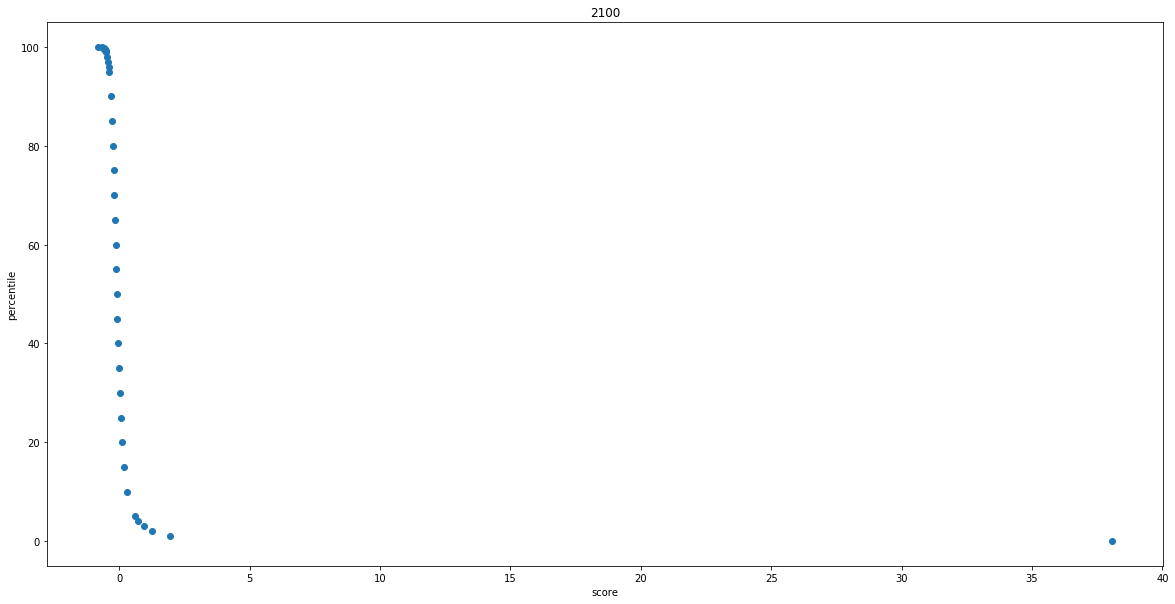

<Figure size 432x288 with 0 Axes>

In [143]:
plt.figure(figsize = (20,10))
plt.scatter(y = percnt_score_2100['percentile'], x = percnt_score_2100['score'] )
plt.ylabel('percentile')
plt.xlabel('score')
plt.title('2100')
plt.show()
plt.savefig(r'C:\Users\ezchave\Desktop\projects\Work\percent_score_2100')

### Zoomed Graph w/o outlier

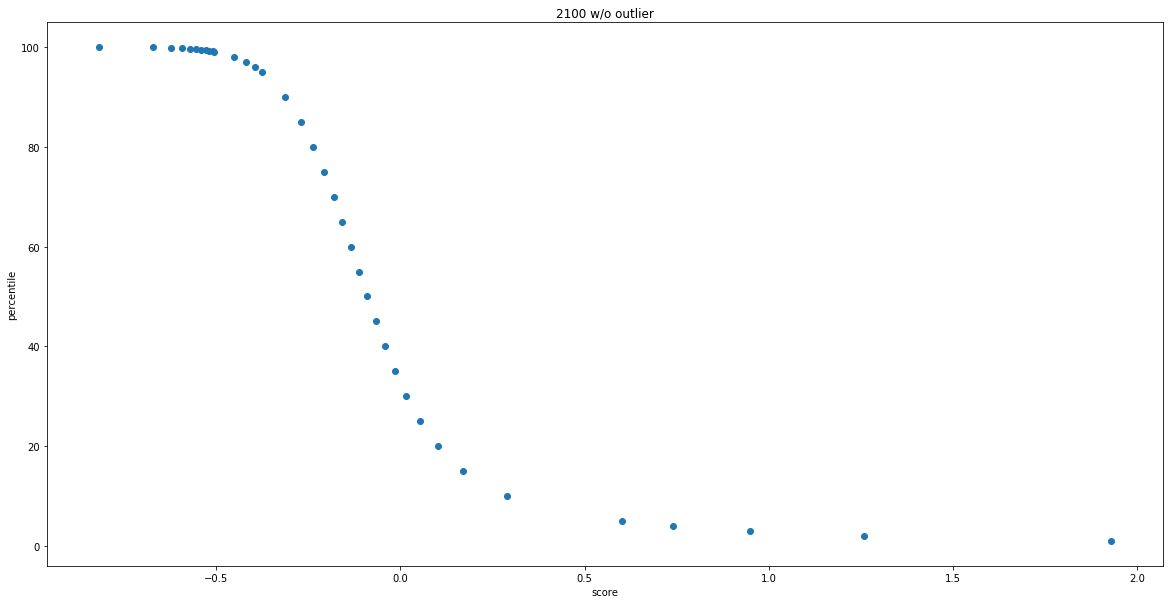

<Figure size 432x288 with 0 Axes>

In [146]:
percnt_score_2100_1 = percnt_score_2100.drop(0,axis = 0)
plt.figure(figsize = (20,10))
plt.scatter(y = percnt_score_2100_1['percentile'], x = percnt_score_2100_1['score'] )
plt.ylabel('percentile')
plt.xlabel('score')
plt.title('2100 w/o outlier')
plt.show()
plt.savefig(r'C:\Users\ezchave\Desktop\projects\Work\percent_score_2100_zoom')

### percent Vs score graph for 1900_1

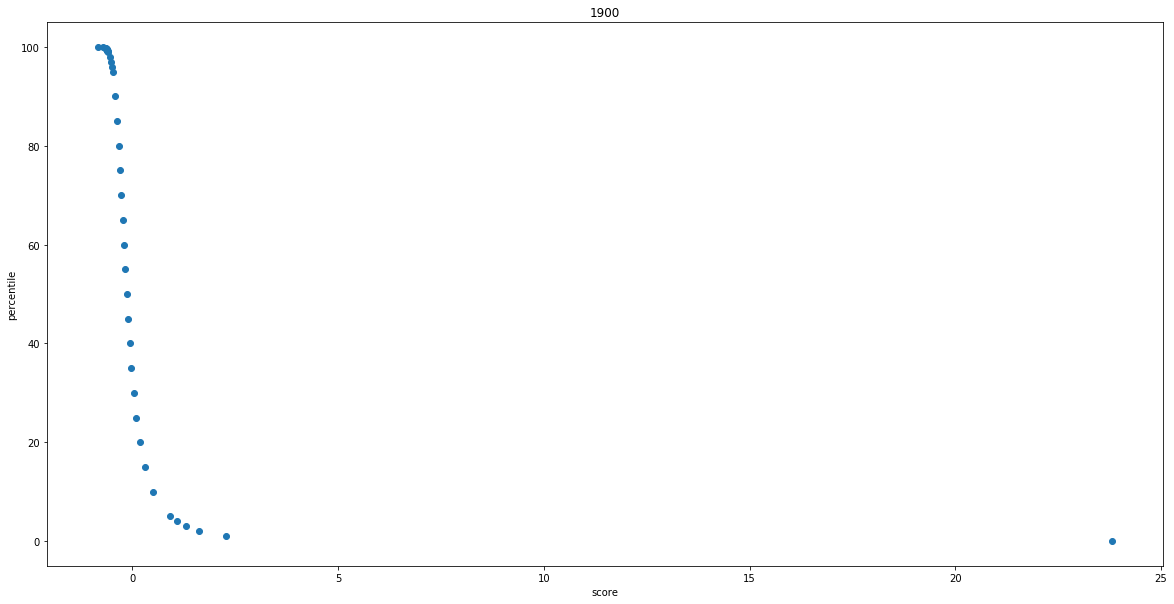

In [161]:
plt.figure(figsize = (20,10))
plt.scatter(y = percnt_score_1900_1['percentile'], x = percnt_score_1900_1['score'] )
plt.ylabel('percentile')
plt.xlabel('score')
plt.title('1900')
plt.show()


### zoomed graph

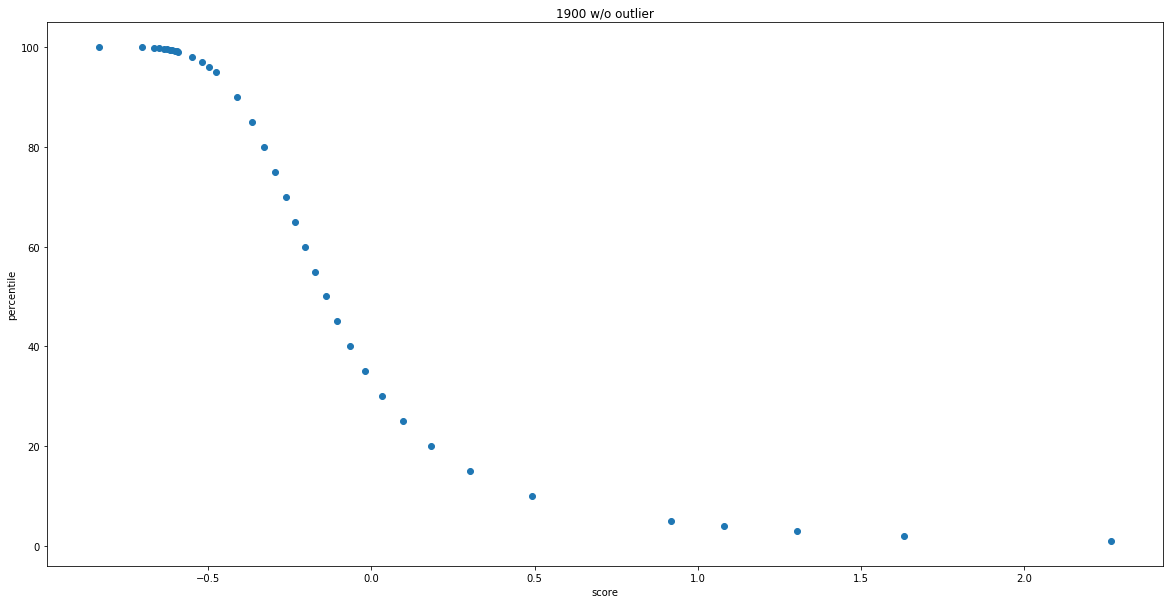

<Figure size 432x288 with 0 Axes>

In [164]:
percnt_score_1900_1_1 = percnt_score_1900_1.drop(0,axis = 0)
plt.figure(figsize = (20,10))
plt.scatter(y = percnt_score_1900_1_1['percentile'], x = percnt_score_1900_1_1['score'] )
plt.ylabel('percentile')
plt.xlabel('score')
plt.title('1900 w/o outlier')
plt.show()
plt.savefig(r'C:\Users\ezchave\Desktop\projects\Work\percent_score_2100_zoom')

### percent Vs score graph for 700 band

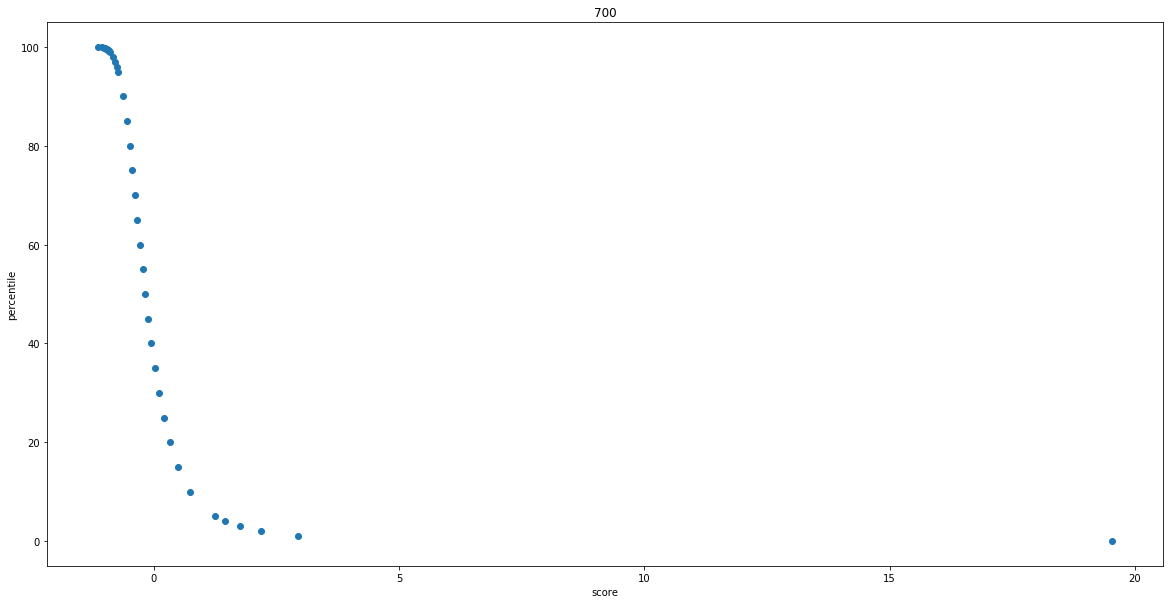

<Figure size 432x288 with 0 Axes>

In [162]:
plt.figure(figsize = (20,10))
plt.scatter(y = percnt_score_700['percentile'], x = percnt_score_700['score'] )
plt.ylabel('percentile')
plt.xlabel('score')
plt.title('700')
plt.show()
plt.savefig(r'C:\Users\ezchave\Desktop\projects\Work\percent_score_700')

### zoomed Graph w/o outlier 

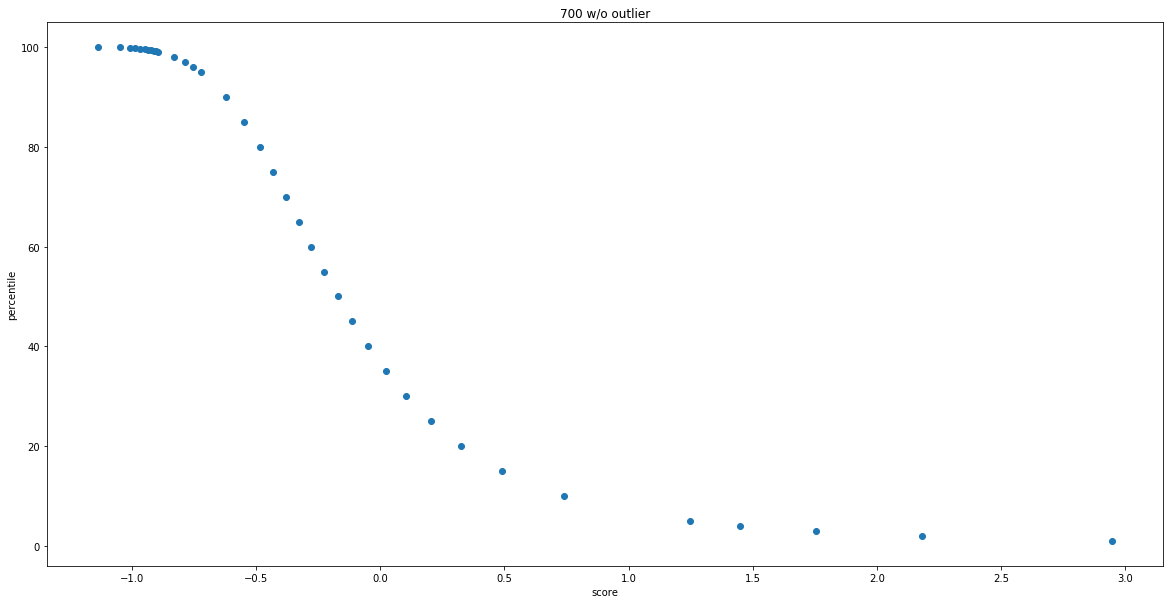

<Figure size 432x288 with 0 Axes>

In [165]:
percnt_score_700_1 = percnt_score_700.drop(0,axis = 0)
plt.figure(figsize = (20,10))
plt.scatter(y = percnt_score_700_1['percentile'], x = percnt_score_700_1['score'] )
plt.ylabel('percentile')
plt.xlabel('score')
plt.title('700 w/o outlier')
plt.show()
plt.savefig(r'C:\Users\ezchave\Desktop\projects\Work\percent_score_2100_zoom')

In [172]:
percnt_score_700.to_csv(r'C:\Users\ezchave\Desktop\projects\Work\percnt_score700.csv')
percnt_score_1900_1.to_csv(r'C:\Users\ezchave\Desktop\projects\Work\percnt_score1900_1.csv')
percnt_score_2100.to_csv(r'C:\Users\ezchave\Desktop\projects\Work\percnt_score2100.csv')
cell_data_700.to_csv(r'C:\Users\ezchave\Desktop\projects\Work\cell_data_700.csv')
cell_data_1900_1.to_csv(r'C:\Users\ezchave\Desktop\projects\Work\cell_data_1900_1.csv')
cell_data_2100.to_csv(r'C:\Users\ezchave\Desktop\projects\Work\cell_data_2100.csv')